
# Install fastai dependencies

In [ ]:
!pip install fastai==1.0.58

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.7/236.7 KB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.1/353.1 KB 13.2 MB/s eta 0:00:00
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19189 sha256=a1014e9b642478bb2e8cfc709906ab5a005e95066f1853cb5a5b0ba5cf865b41
  Stored in directory: /root/.cache/pip/wheels/f6/d8/b0/15cfd7805d39250ac29318105f09b1750683387630d68423e1
Successfully built nvidia-ml-py3
  Attempting uninstall: fastai
    Found existing installation: fastai 2.7.11
    Uninstalling fastai-2.7.11:
      Successfully uninstalled fastai-2.7.11


In [ ]:
from fastai.vision import *

# Download Custom Classification Data From Roboflow

In [ ]:
#follow the link below to get your download code from from Roboflow
!pip install -q roboflow
from roboflow import Roboflow
rf = Roboflow(model_format="folder", notebook="roboflow-resnet")

RuntimeError: ignored

In [ ]:
#dataset imported from Roboflow. You can sign up at roboflow.com and upload your image classification dataset
# from roboflow import Roboflow
# rf = Roboflow(api_key="YOUR_API_KEY")
# project = rf.workspace().project("YOUR_PROJECT")
# dataset = project.version("YOUR VERSION").download("folder")
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="K5BwZ8klaouCeUYV0RXV")
project = rf.workspace("sanskriti-jain").project("trail-camera-animal-detection")
dataset = project.version(4).download("clip")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Trail-Camera-Animal-Detection-4 in clip:: 100%|██████████| 1017/1017 [00:00<00:00, 1635.66it/s]


In [ ]:
dataset.location

'/content/Trail-Camera-Animal-Detection-4'

In [ ]:
#build fastai dataset loader
import numpy as np
from pathlib import Path
np.random.seed(42)
#fastai automatically factors the ./train and ./valid folders into seperate datasets
#more details https://docs.fast.ai/vision.data.html#ImageDataLoaders.from_folder
path = Path(dataset.location)
data = ImageDataBunch.from_folder(path, size=224, num_workers=4).normalize(imagenet_stats)
#data = ImageDataLoaders.from_folder(path, size=224, num_workers=4).normalize(imagenet_stats)

Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
Default grid_sample and 

In [ ]:
#double check the data classes
data.classes

['animals', 'animals_multiple', 'empty']

Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See t

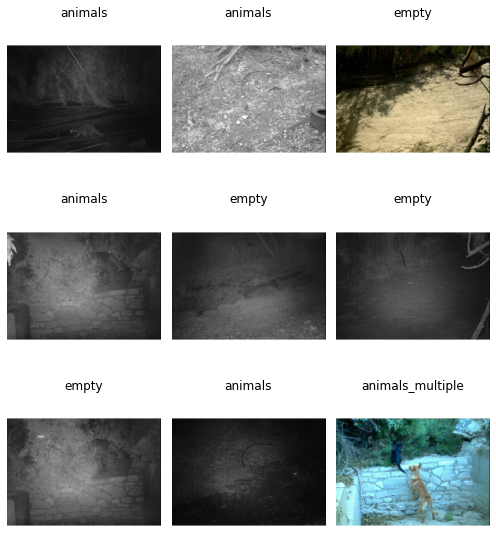

In [ ]:
#take a peak at the batch to make sure things were loaded correctly
data.show_batch(rows=3, figsize=(7, 8))


# Set up fastai Resnet model

In [ ]:
from fastai.metrics import error_rate # 1 - accuracy
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [ ]:
#print network layers
learn

Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See t

Learner(data=ImageDataBunch;

Train: LabelList (700 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
empty,empty,empty,empty,empty
Path: /content/Trail-Camera-Animal-Detection-4;

Valid: LabelList (200 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
empty,empty,empty,empty,empty
Path: /content/Trail-Camera-Animal-Detection-4;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchN

# Train Custom Resnet Image Classifier

In [ ]:
from fastai.callbacks import *
early_stop = EarlyStoppingCallback(learn, patience=20)
save_best_model = SaveModelCallback(learn, name='best_resnet34')

In [ ]:
#frozen training step
defaults.device = torch.device('cuda') # makes sure the gpu is used
learn.fit_one_cycle(1, callbacks=[early_stop, save_best_model])

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
Default grid_sample and 

Better model found at epoch 0 with valid_loss value: 1.3742976188659668.


In [ ]:
#load best model from frozen training
learn.load('best_resnet34')


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See t

Learner(data=ImageDataBunch;

Train: LabelList (700 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
empty,empty,empty,empty,empty
Path: /content/Trail-Camera-Animal-Detection-4;

Valid: LabelList (200 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
empty,empty,empty,empty,empty
Path: /content/Trail-Camera-Animal-Detection-4;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchN

In [ ]:
learn.unfreeze()

In [ ]:
def find_appropriate_lr(model:Learner, lr_diff:int = 15, loss_threshold:float = .05, adjust_value:float = 1, plot:bool = False) -> float:
    #Run the Learning Rate Finder
    model.lr_find()
    
    #Get loss values and their corresponding gradients, and get lr values
    losses = np.array(model.recorder.losses)
    min_loss_index = np.argmin(losses)
    
    
    #loss_grad = np.gradient(losses)
    lrs = model.recorder.lrs
    
    #return the learning rate that produces the minimum loss divide by 10   
    return lrs[min_loss_index] / 10

In [ ]:
optimal_lr = find_appropriate_lr(learn)

Streaming output truncated to the last 5000 lines.
Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [ ]:
learn.fit_one_cycle(1, max_lr=slice(optimal_lr/10, optimal_lr), callbacks=[early_stop, save_best_model])


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See t

Better model found at epoch 0 with valid_loss value: 1.0700457096099854.


In [ ]:
learn.load('best_resnet34')


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See t

Learner(data=ImageDataBunch;

Train: LabelList (700 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
empty,empty,empty,empty,empty
Path: /content/Trail-Camera-Animal-Detection-4;

Valid: LabelList (200 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
empty,empty,empty,empty,empty
Path: /content/Trail-Camera-Animal-Detection-4;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchN

# Evaluate Classifier Performance

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
Default grid_sample and 

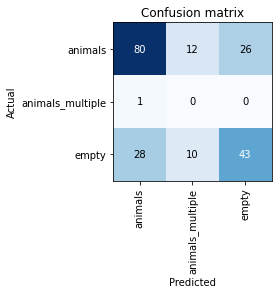

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See t

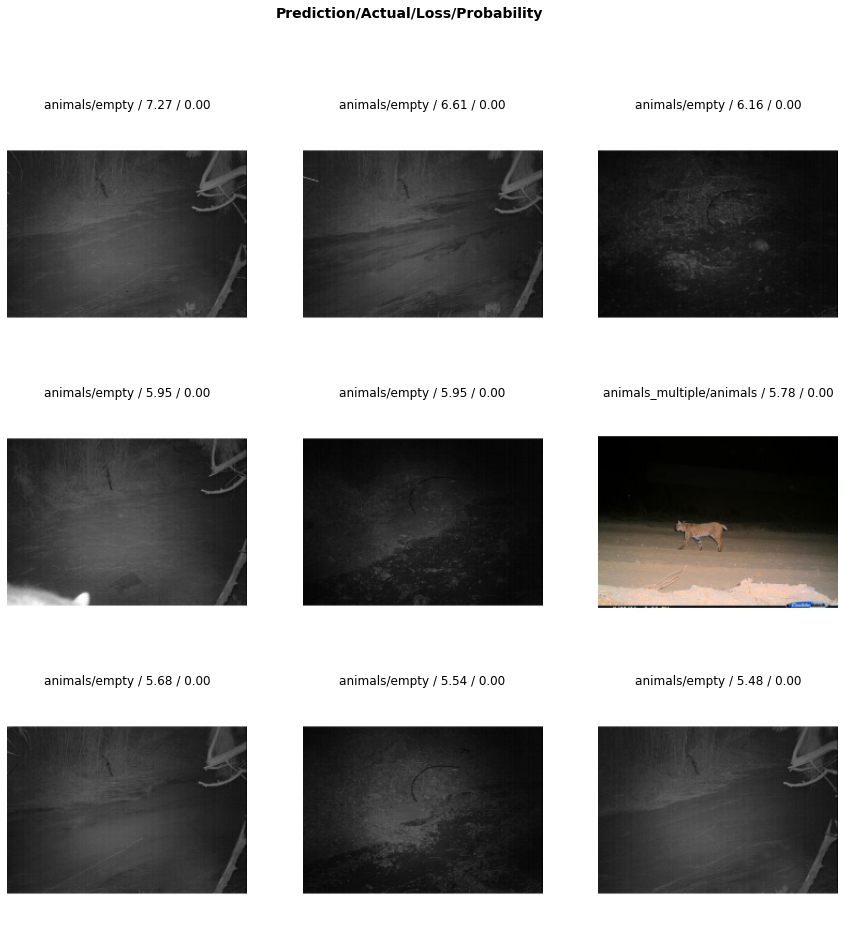

In [ ]:
interp.plot_top_losses(9, figsize=(15,15))


/content/Trail-Camera-Animal-Detection-4/test/animals_multiple/5a0e3498-23d2-11e8-a6a3-ec086b02610b_jpg.rf.3c7f6b8c2fe704445a8208e748a3949a.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


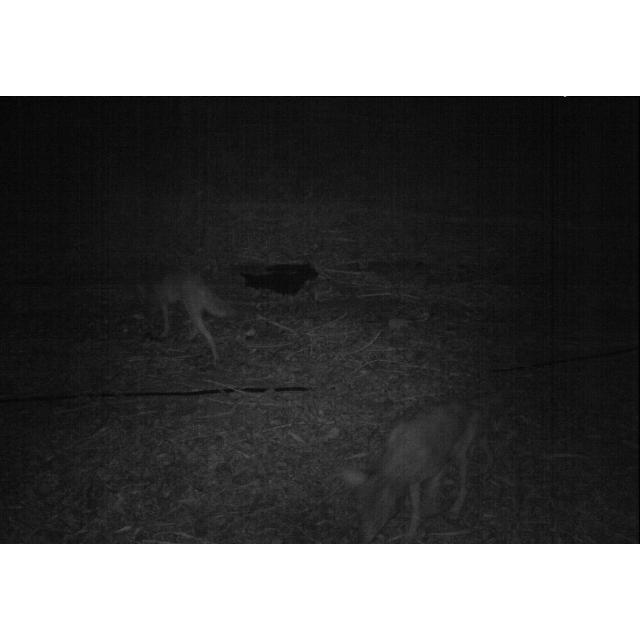



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0c9a41-23d2-11e8-a6a3-ec086b02610b_jpg.rf.ccec17845099343a27c3fb8e6e747559.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


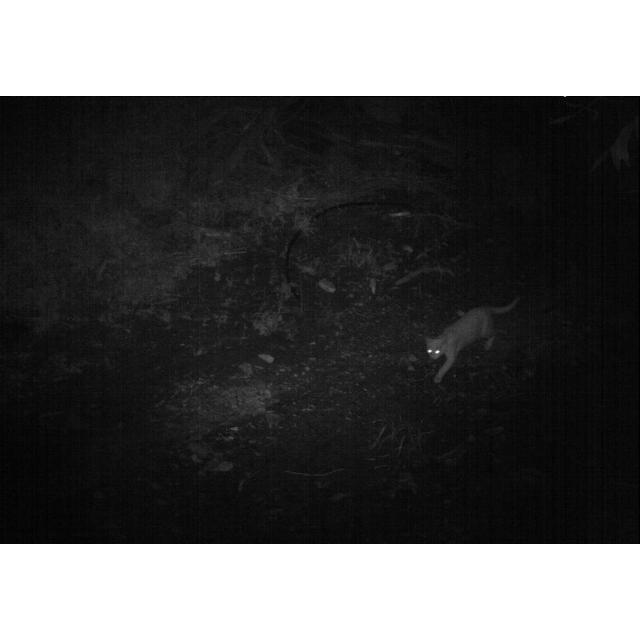



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0c9b2d-23d2-11e8-a6a3-ec086b02610b_jpg.rf.aa71dce3c61007d7527fb12a36bbb1c8.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


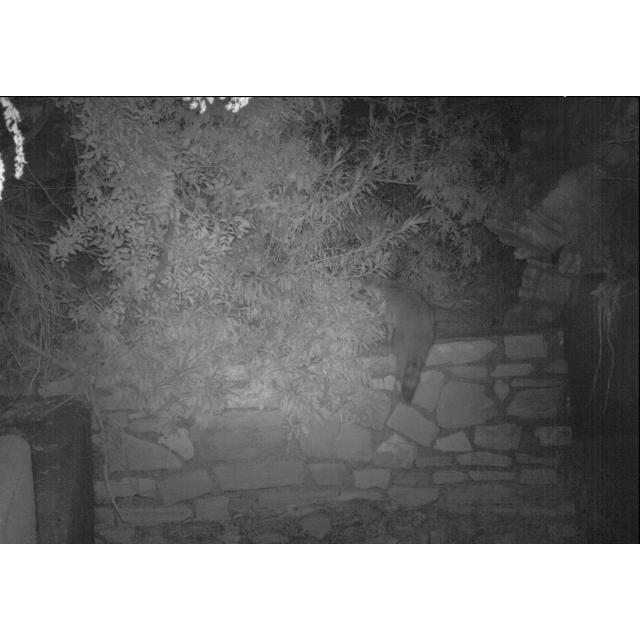



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0fcef4-23d2-11e8-a6a3-ec086b02610b_jpg.rf.a8dcbcdae994f3e3a32db8448502d20a.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


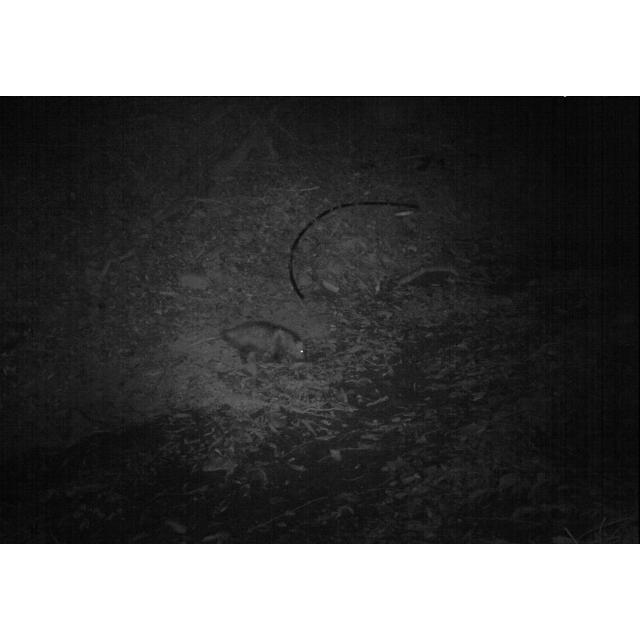



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0b022b-23d2-11e8-a6a3-ec086b02610b_jpg.rf.6a30b047ebdbde7e105776faca4c7211.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


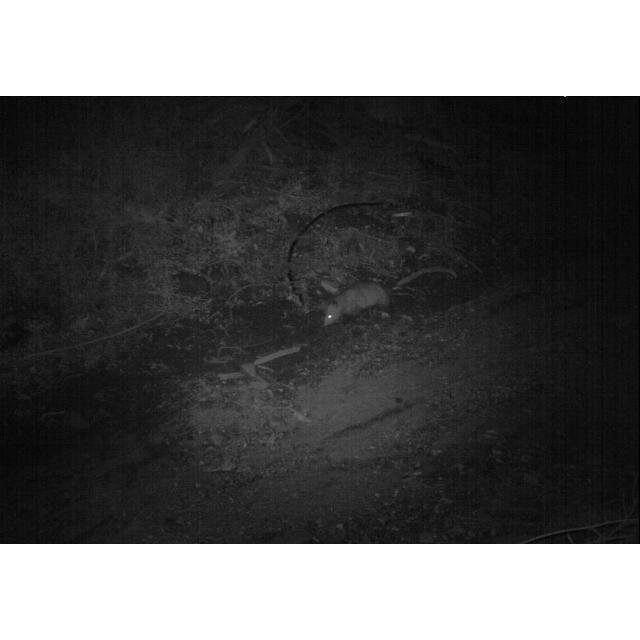



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0b00dc-23d2-11e8-a6a3-ec086b02610b_jpg.rf.9f1dc968976cff1974fefca30ad8bcc6.jpg


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


animals


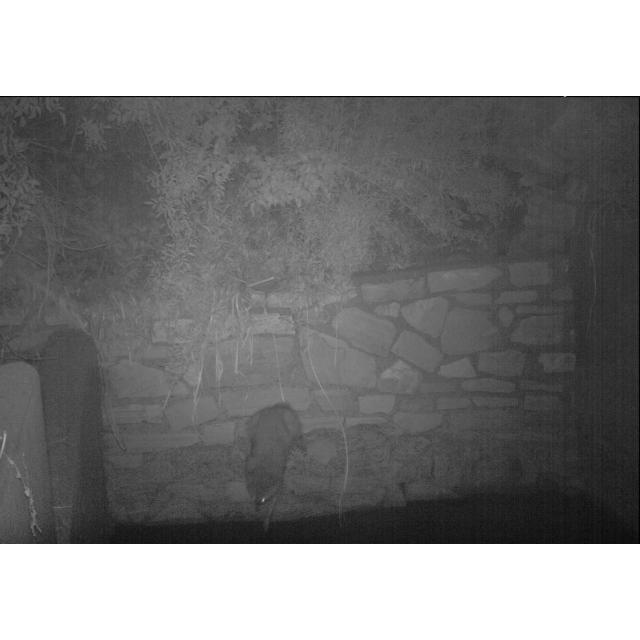



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0e352d-23d2-11e8-a6a3-ec086b02610b_jpg.rf.cb6819927965dd2a1cc186026a6ee167.jpg
animals_multiple


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


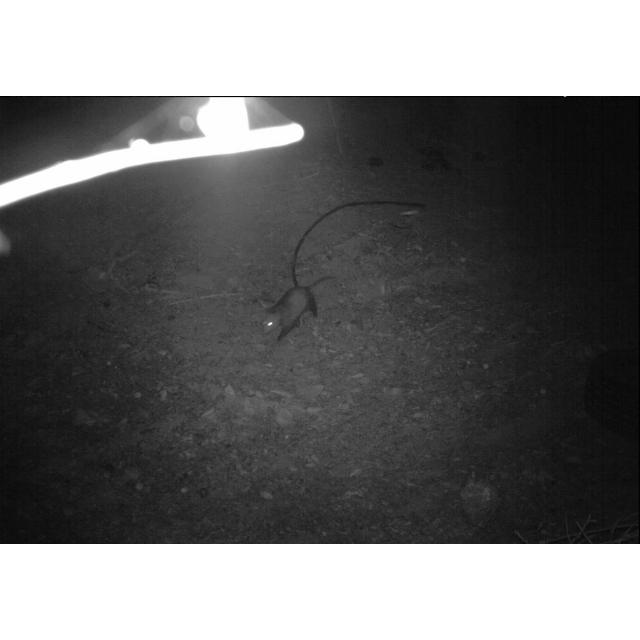



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0c9b03-23d2-11e8-a6a3-ec086b02610b_jpg.rf.a736773dc28be64dd9815fc37df8cfb6.jpg


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


animals


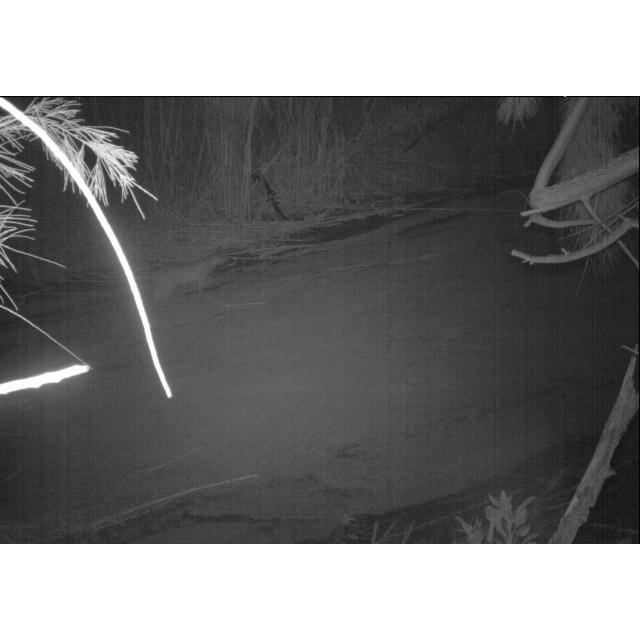



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0b021d-23d2-11e8-a6a3-ec086b02610b_jpg.rf.9eeea1af1b9065f76745b178e68a9c26.jpg


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


animals


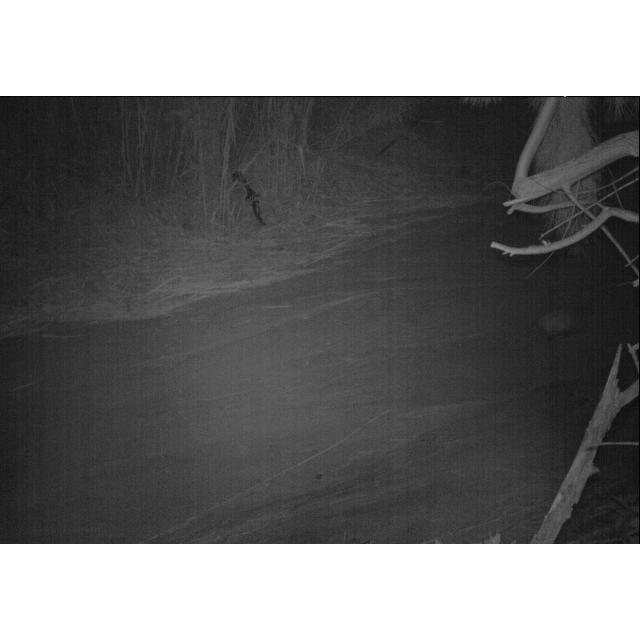



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0affb7-23d2-11e8-a6a3-ec086b02610b_jpg.rf.196009444dcd769b751b69c1ba2841a8.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


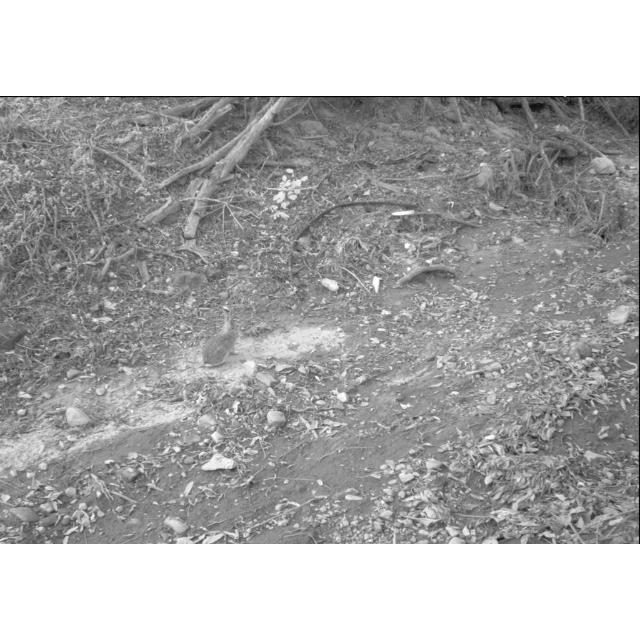



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0e37f0-23d2-11e8-a6a3-ec086b02610b_jpg.rf.1fbc5b793ec4865da39c5b18bc35d5e2.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


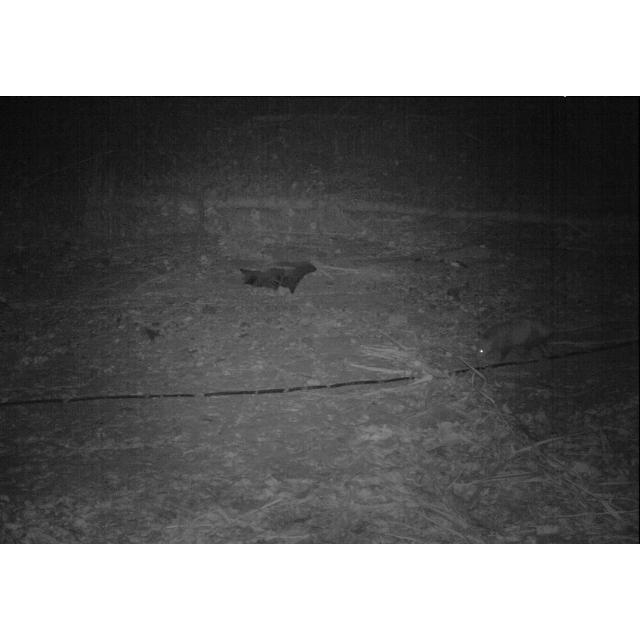



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0b00b4-23d2-11e8-a6a3-ec086b02610b_jpg.rf.cc064fd964269f950f28371fc3d601ca.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


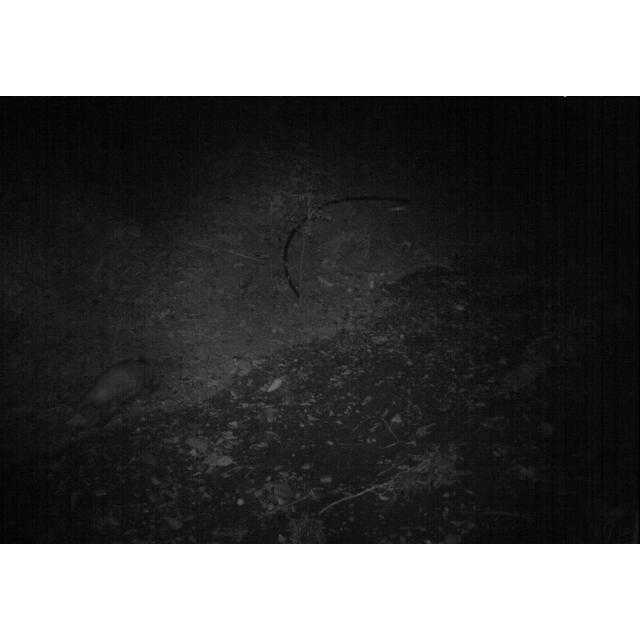

Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.




/content/Trail-Camera-Animal-Detection-4/test/animals/5a0e36c0-23d2-11e8-a6a3-ec086b02610b_jpg.rf.13961ae70fa145eaffe7cc26e8929904.jpg
animals_multiple


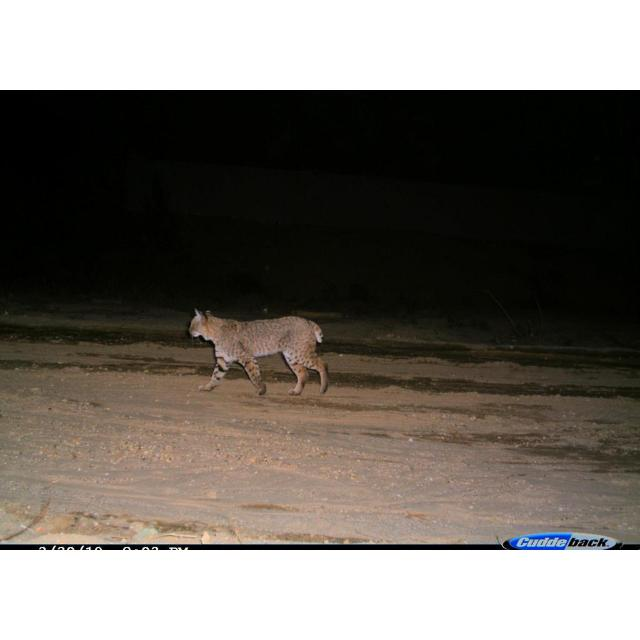



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0e377b-23d2-11e8-a6a3-ec086b02610b_jpg.rf.16315c02e1e32fa9f22f6d869ee1994d.jpg


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


animals_multiple


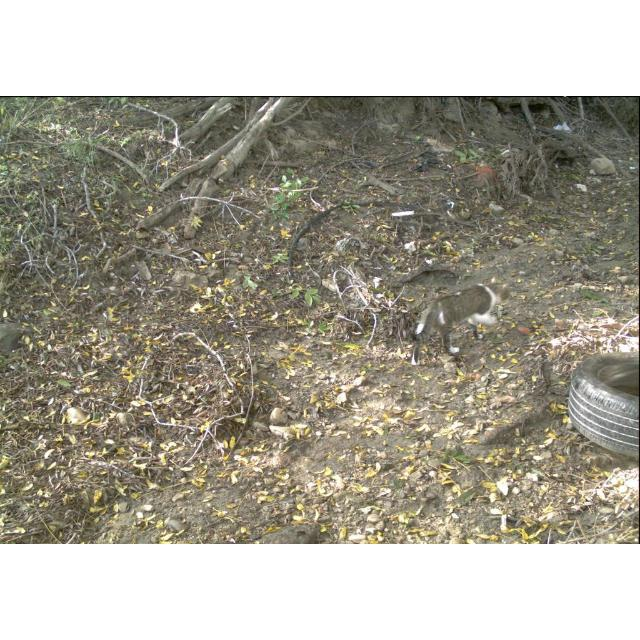



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0c9b9a-23d2-11e8-a6a3-ec086b02610b_jpg.rf.c163a1b0c18fb13dfc6b43434600729a.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


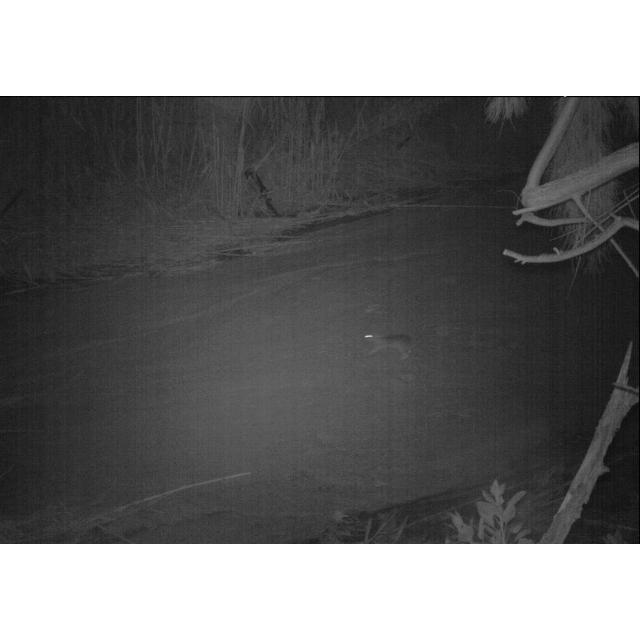



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0e3573-23d2-11e8-a6a3-ec086b02610b_jpg.rf.3226f86fcbd7353a718768894c77ac3c.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


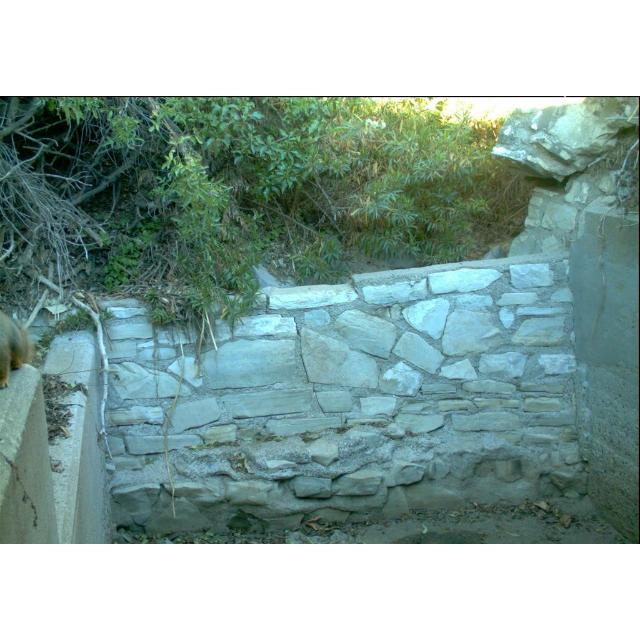



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0e373f-23d2-11e8-a6a3-ec086b02610b_jpg.rf.be2c070de70e205b714fa8d75e18d938.jpg
empty


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


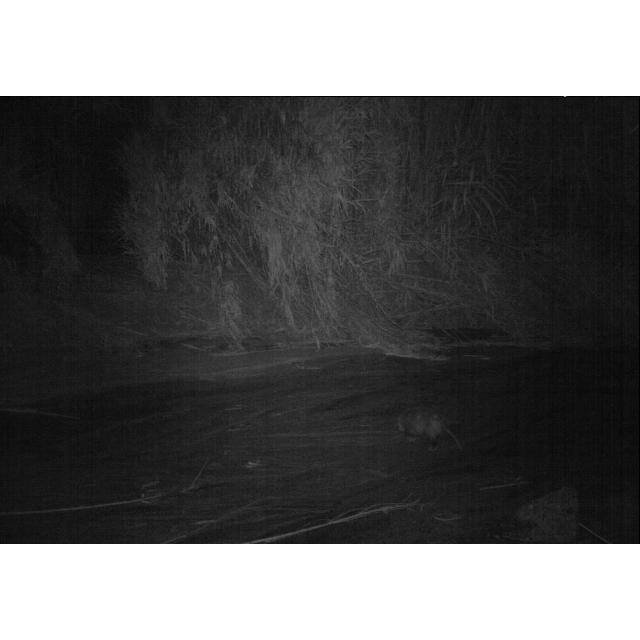



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0b01ed-23d2-11e8-a6a3-ec086b02610b_jpg.rf.20a190fcce87ddc5faab2459d12396d7.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


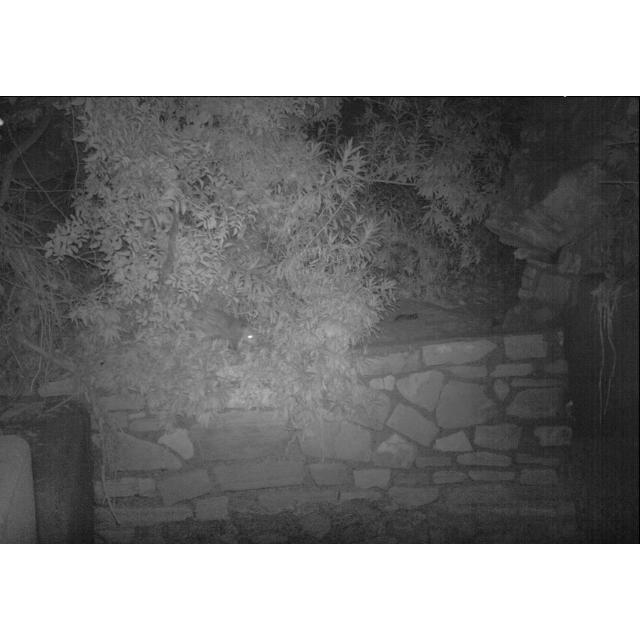



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0c9a95-23d2-11e8-a6a3-ec086b02610b_jpg.rf.c3d4a84a17e39e97b3d464be601787aa.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


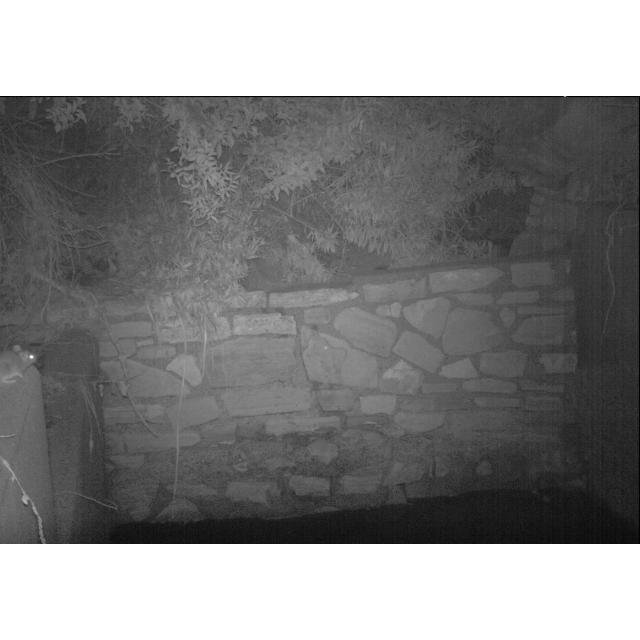



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0fcf9e-23d2-11e8-a6a3-ec086b02610b_jpg.rf.c3694856b7a38c41700ab44ba6cda263.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


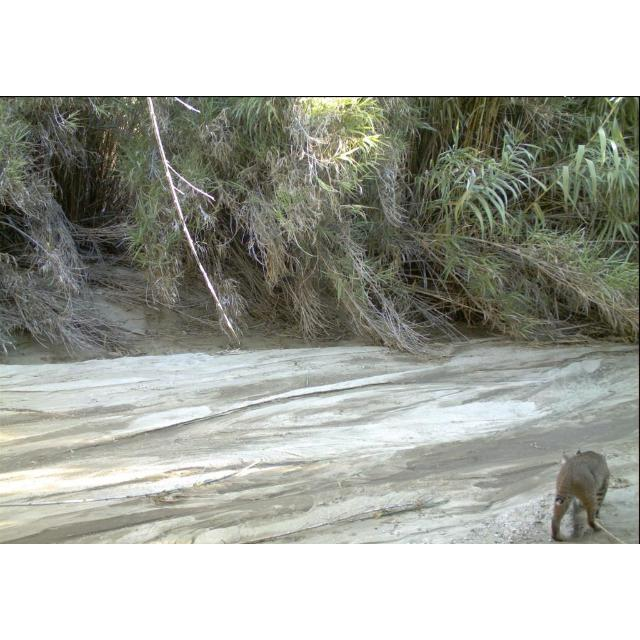



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0b00ee-23d2-11e8-a6a3-ec086b02610b_jpg.rf.c0ce9855fd7e88677d7c595cbbf7277f.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


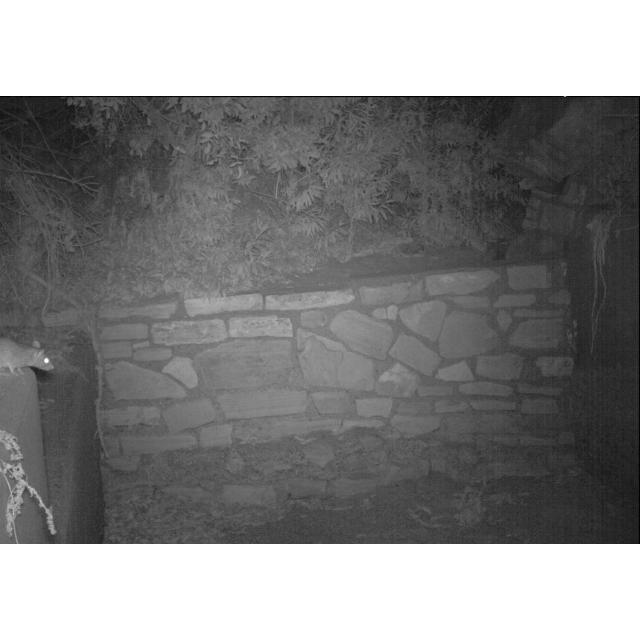



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0b00b5-23d2-11e8-a6a3-ec086b02610b_jpg.rf.91f2b09d7d0e06e6e6494405c4f31011.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


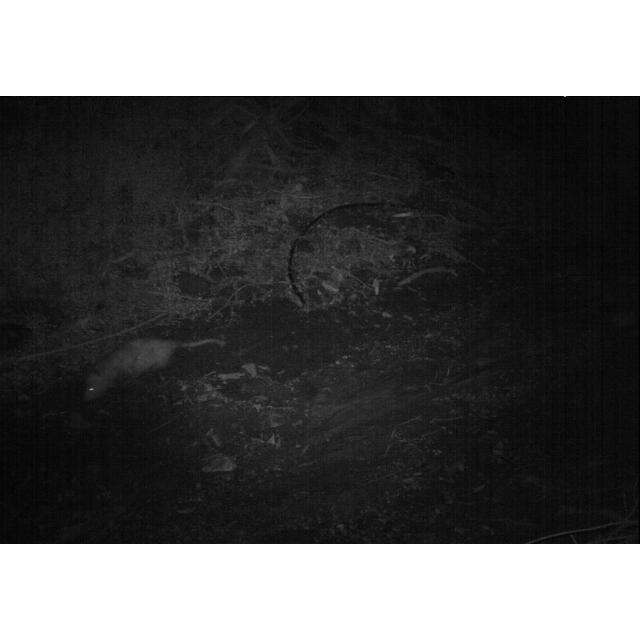



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0fd13a-23d2-11e8-a6a3-ec086b02610b_jpg.rf.67d17704225c14d11447b4f749cda9d8.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


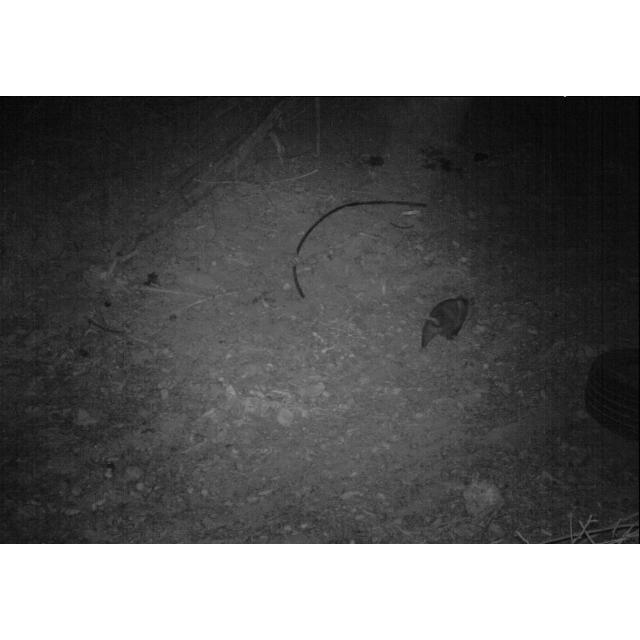



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0fd0b1-23d2-11e8-a6a3-ec086b02610b_jpg.rf.6798e7016af0800009ef8b1d148d6bd4.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


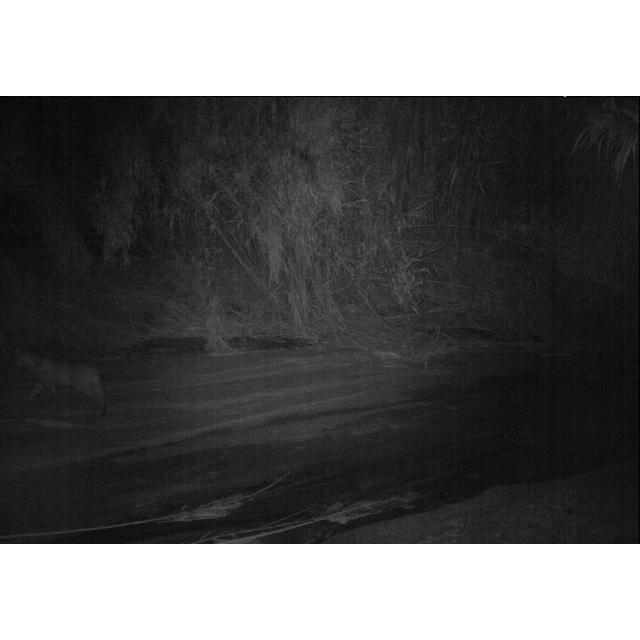



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0e34f5-23d2-11e8-a6a3-ec086b02610b_jpg.rf.0a2399c3d34623890e0c068a0e3f1d74.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


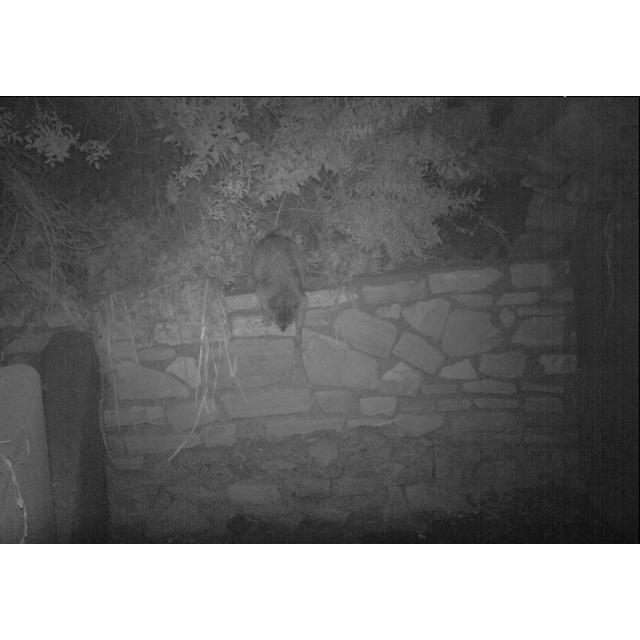



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0c9b18-23d2-11e8-a6a3-ec086b02610b_jpg.rf.60638d546d5a342216143dc912d654a5.jpg
animals_multiple


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


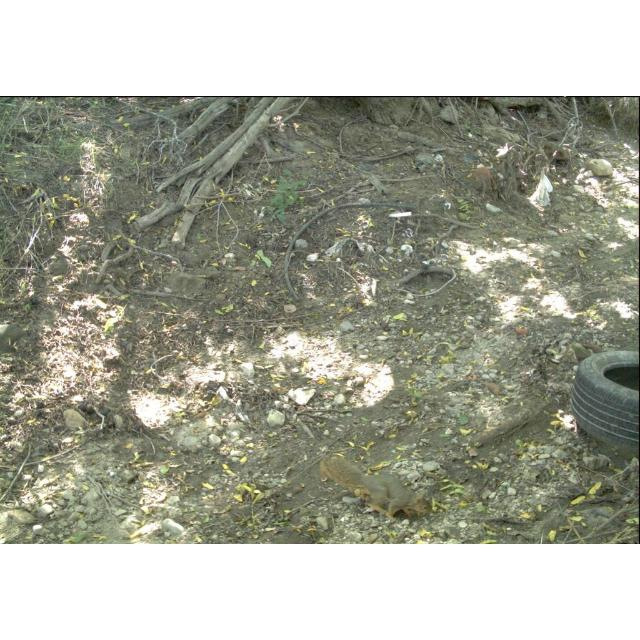



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0c9ba1-23d2-11e8-a6a3-ec086b02610b_jpg.rf.bb2c318a3844e5500c41255a4c0fda98.jpg
empty


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


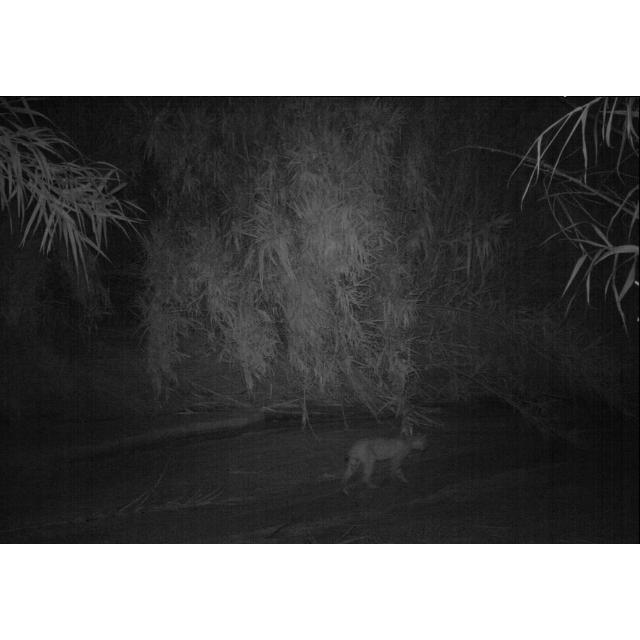



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0e3478-23d2-11e8-a6a3-ec086b02610b_jpg.rf.411504f292487ad4688500d19e70f2d3.jpg
empty


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


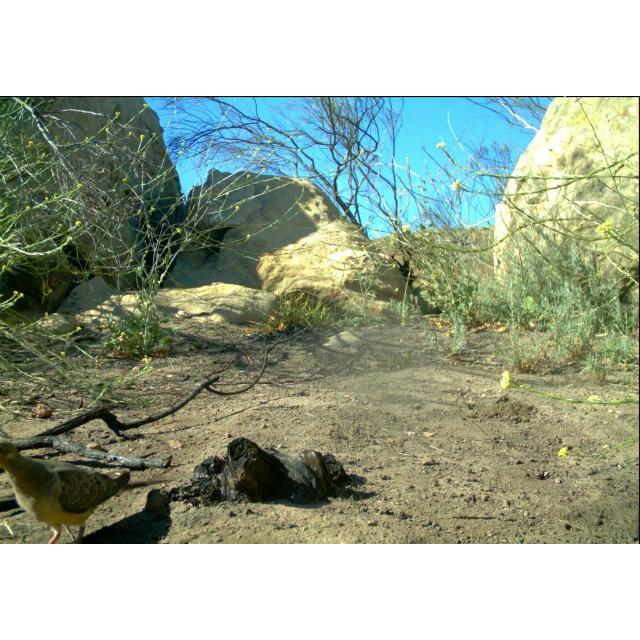



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0e379c-23d2-11e8-a6a3-ec086b02610b_jpg.rf.946a14244dba936fcd41788811a38a51.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


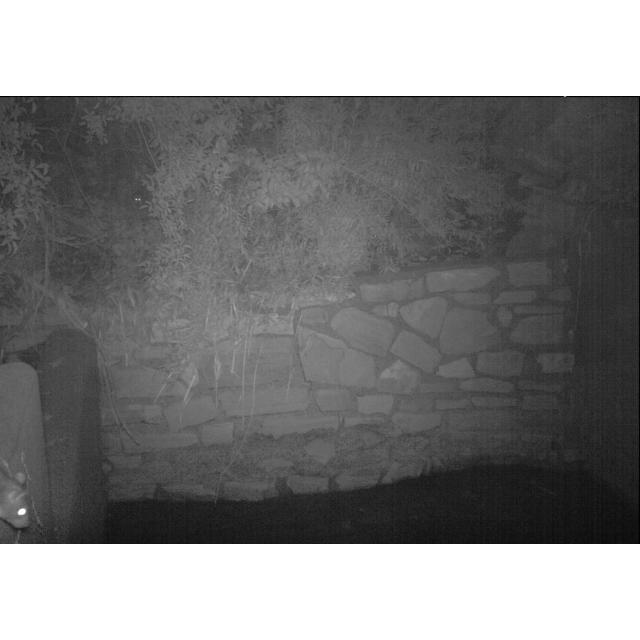



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0b0226-23d2-11e8-a6a3-ec086b02610b_jpg.rf.b95f22f7d5a49a7501a7decac8b1cf35.jpg
empty


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


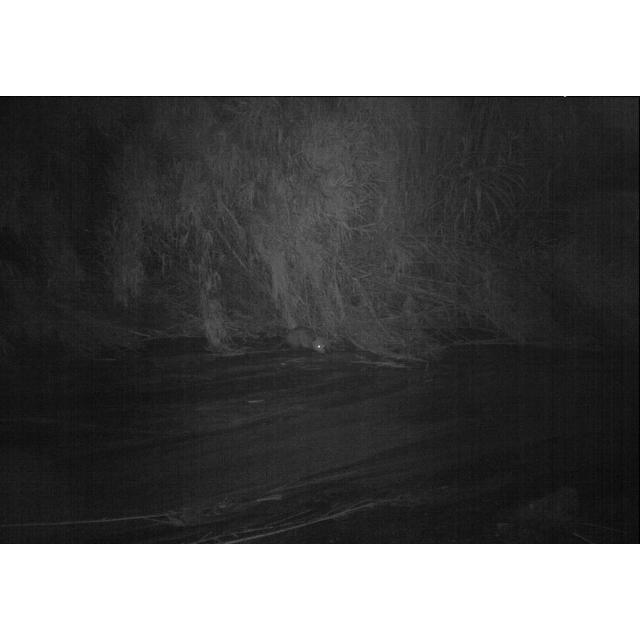



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0c9cf1-23d2-11e8-a6a3-ec086b02610b_jpg.rf.1e03b956b1f2442f7457a9484292c482.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


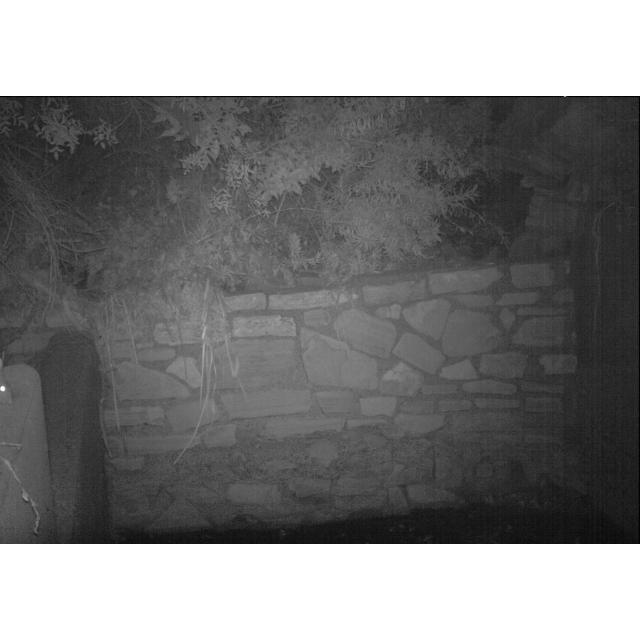



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0b01ff-23d2-11e8-a6a3-ec086b02610b_jpg.rf.abeeabfd31301bf832ef2304bfb520f0.jpg
animals_multiple


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


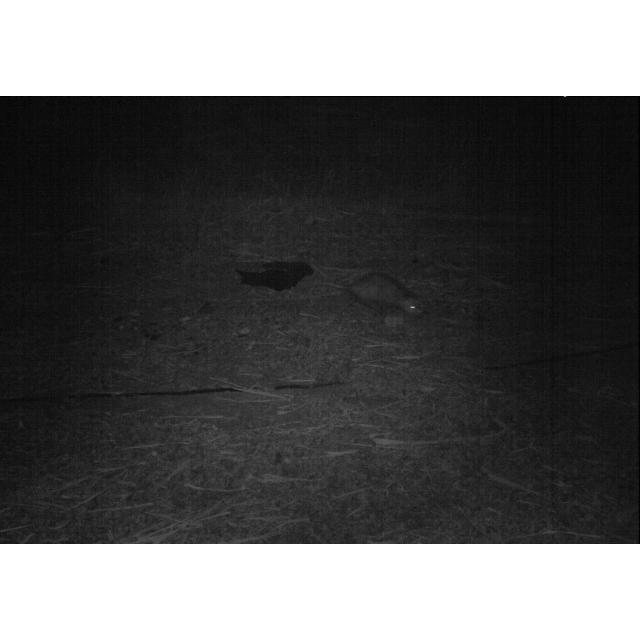



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0e359f-23d2-11e8-a6a3-ec086b02610b_jpg.rf.7e8686d245f8abcd55a297031038f1ae.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


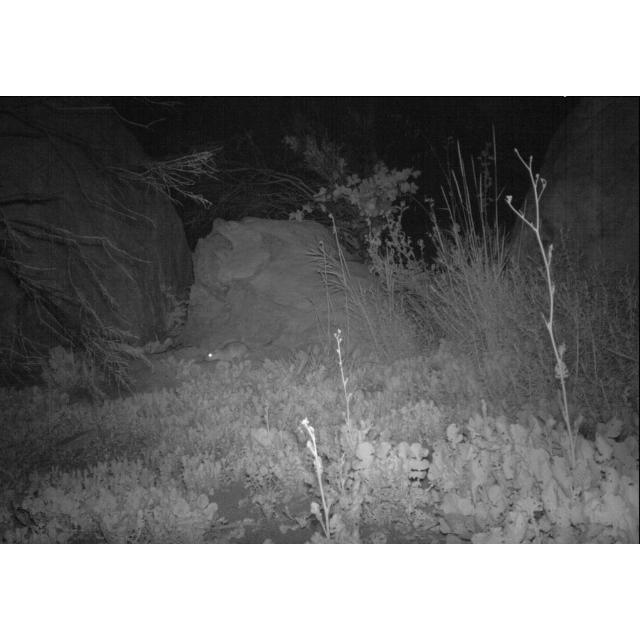



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0fcf72-23d2-11e8-a6a3-ec086b02610b_jpg.rf.44b4a4362321516b8813bcc3c92eb5ab.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


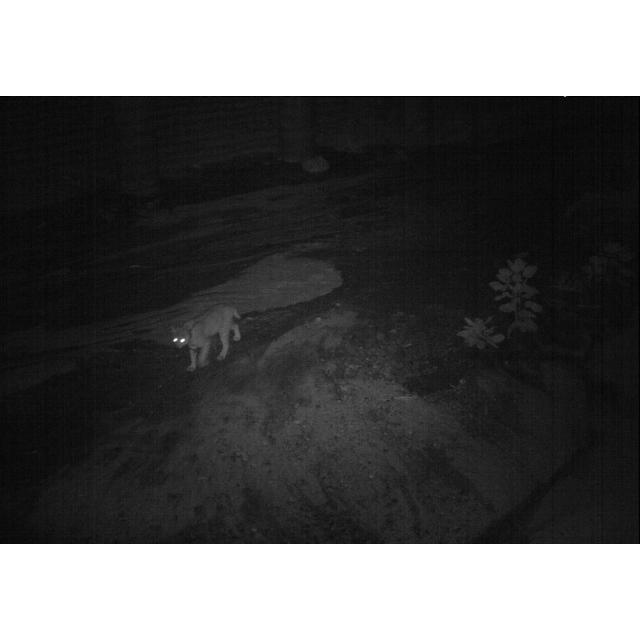



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0e3806-23d2-11e8-a6a3-ec086b02610b_jpg.rf.7d9632cf4ae8de0bad1d8f150e7d4093.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


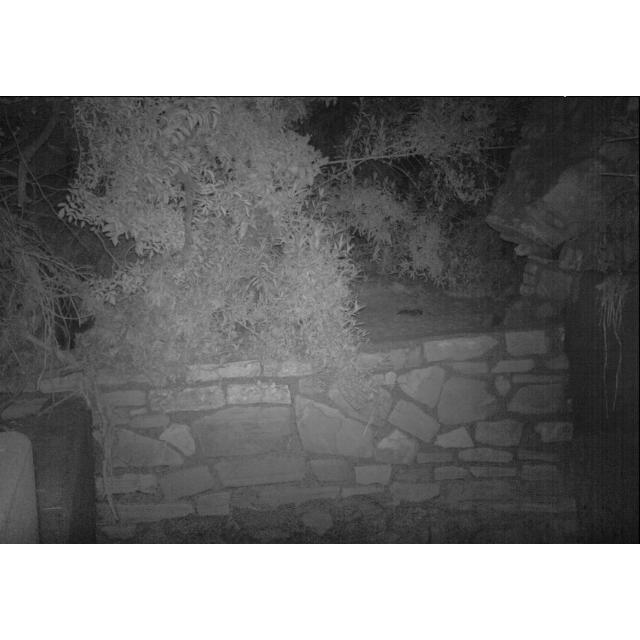



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0b0250-23d2-11e8-a6a3-ec086b02610b_jpg.rf.185937bf8ea0956d651be465011a8836.jpg
animals_multiple


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


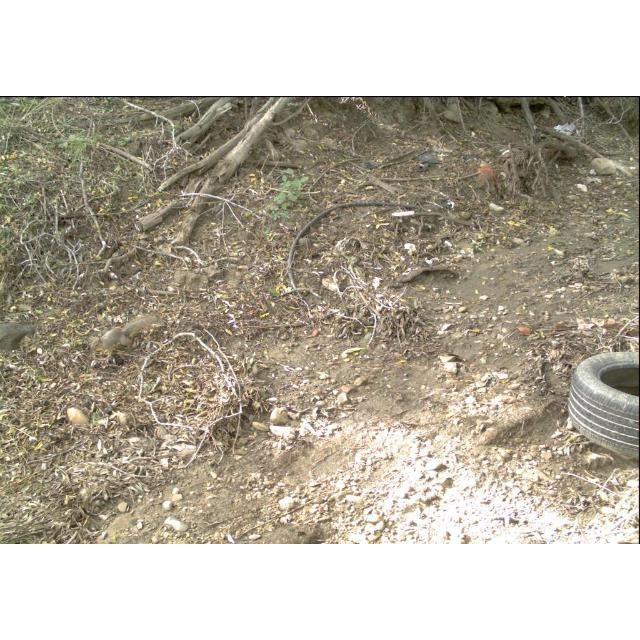



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0c9c3a-23d2-11e8-a6a3-ec086b02610b_jpg.rf.a9ed3cec615b01f135a2a2ec24dc2420.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


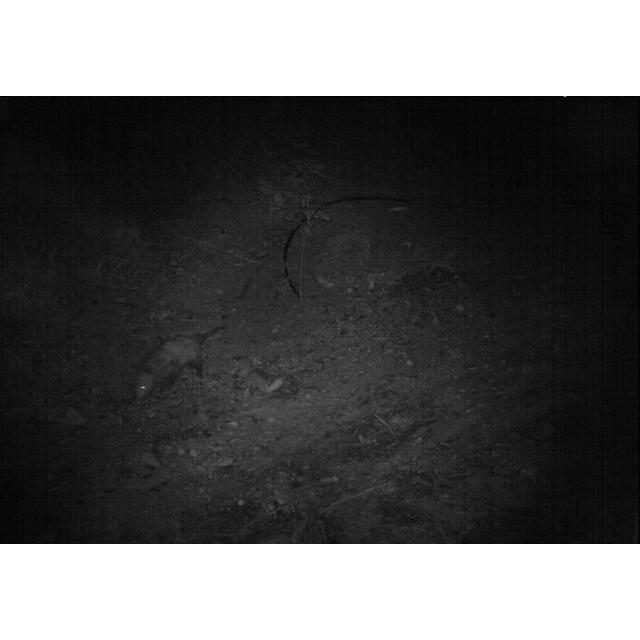



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0c9bbe-23d2-11e8-a6a3-ec086b02610b_jpg.rf.5ab16aff08ef9f96a24e05811fbf82ac.jpg
animals_multiple


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


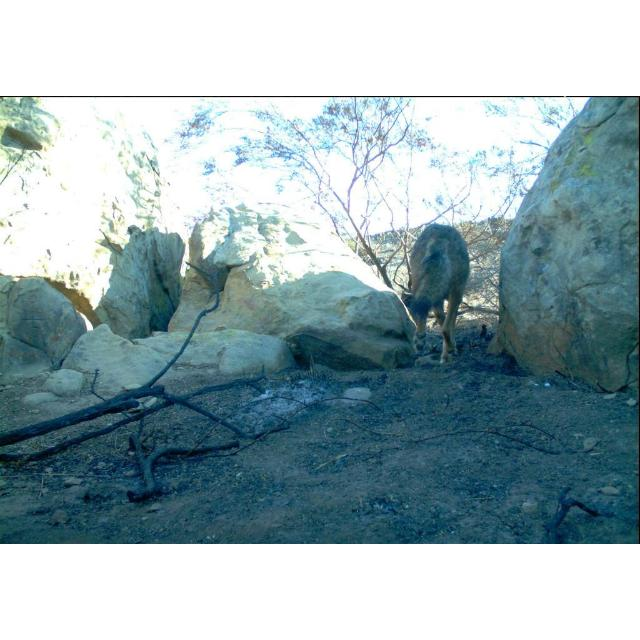



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0c9ab3-23d2-11e8-a6a3-ec086b02610b_jpg.rf.7c9f35c99fe3bb3e60147e68010e2615.jpg
empty


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


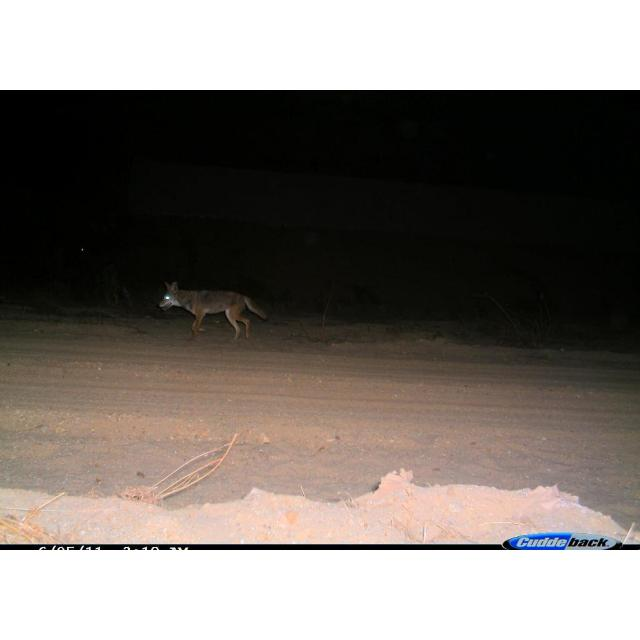



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0b01ad-23d2-11e8-a6a3-ec086b02610b_jpg.rf.ec2196b78e82568f1fedbc36b9573cc1.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


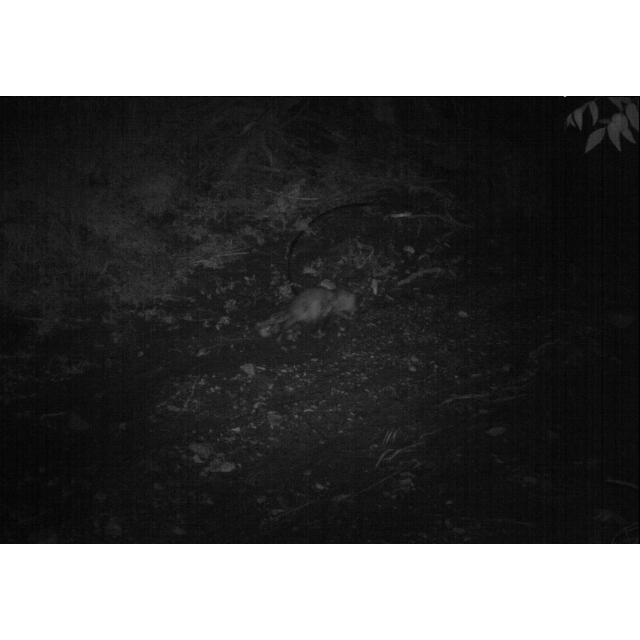



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0c9d83-23d2-11e8-a6a3-ec086b02610b_jpg.rf.3df601df27d9d6da7db5f6ec42e720c0.jpg
empty


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


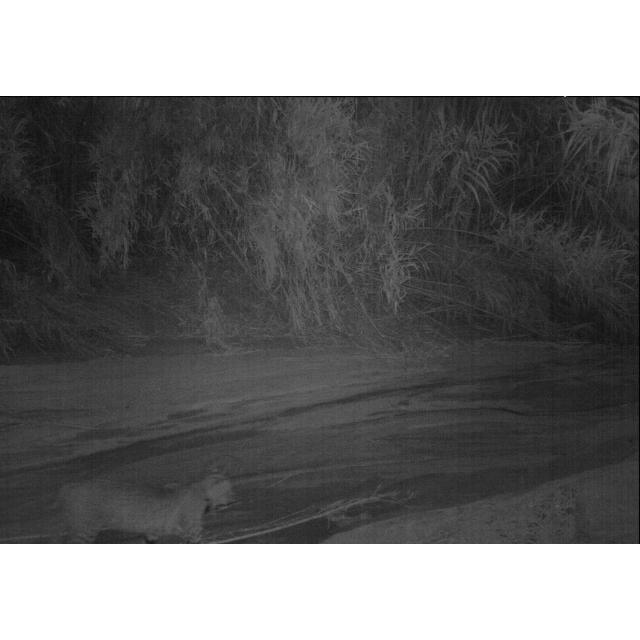



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0c9bdb-23d2-11e8-a6a3-ec086b02610b_jpg.rf.e7b3de46f93aff54fb7b9487550d5637.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


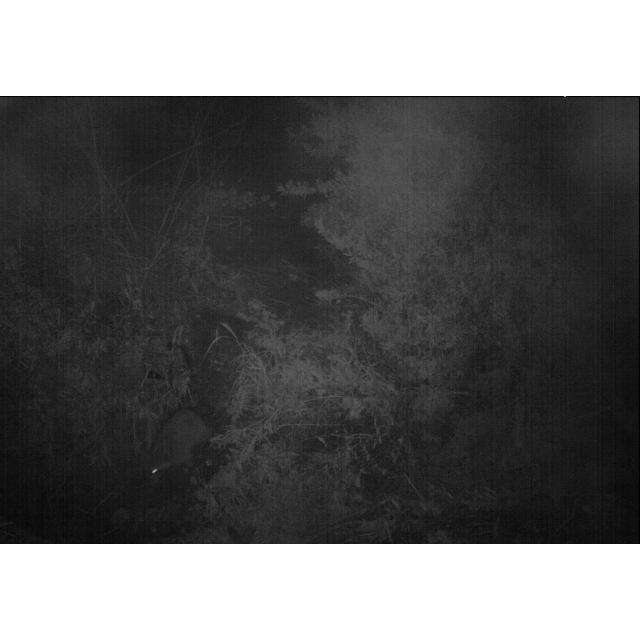



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0c9da1-23d2-11e8-a6a3-ec086b02610b_jpg.rf.4dcb2dc8caa38316256b562326adb548.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


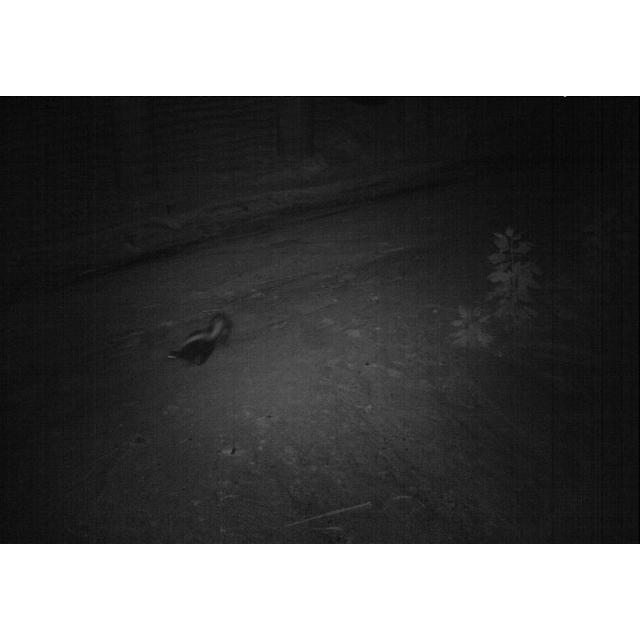



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0b0257-23d2-11e8-a6a3-ec086b02610b_jpg.rf.831ae90014e5ad8a924b9f0a70e74528.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


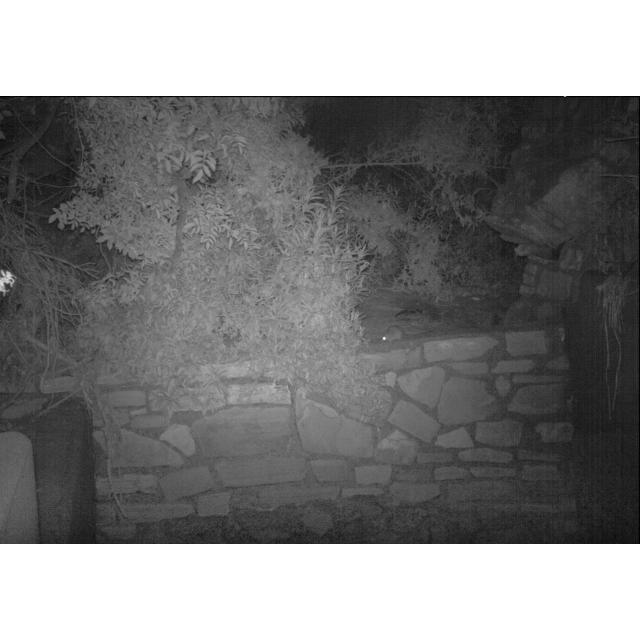



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0fd0cf-23d2-11e8-a6a3-ec086b02610b_jpg.rf.c8565c8630dca4cbdfc6352857053fcb.jpg
animals_multiple


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


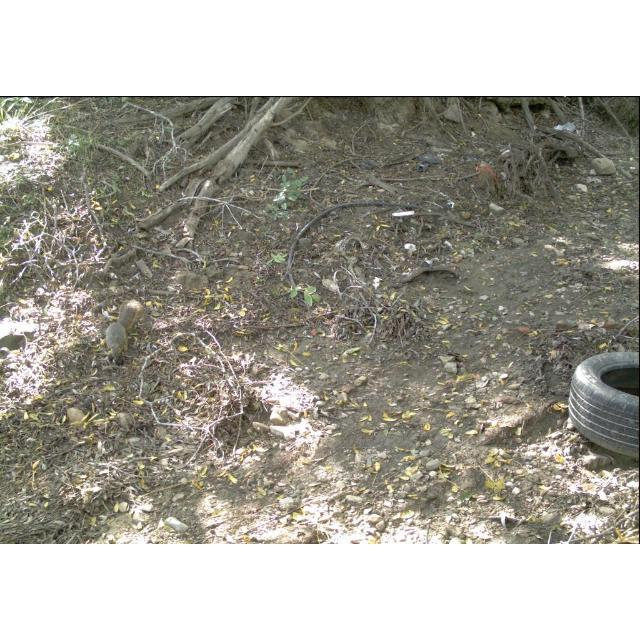



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0e3588-23d2-11e8-a6a3-ec086b02610b_jpg.rf.4b1b89e707fb289a50f11ed984d7a3d5.jpg
empty


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


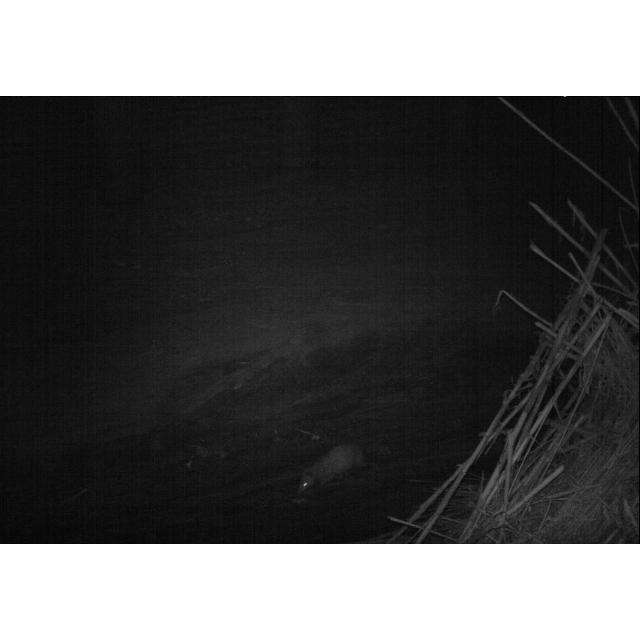



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0b009e-23d2-11e8-a6a3-ec086b02610b_jpg.rf.e42b01e2b61197d5368028d61fb10465.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


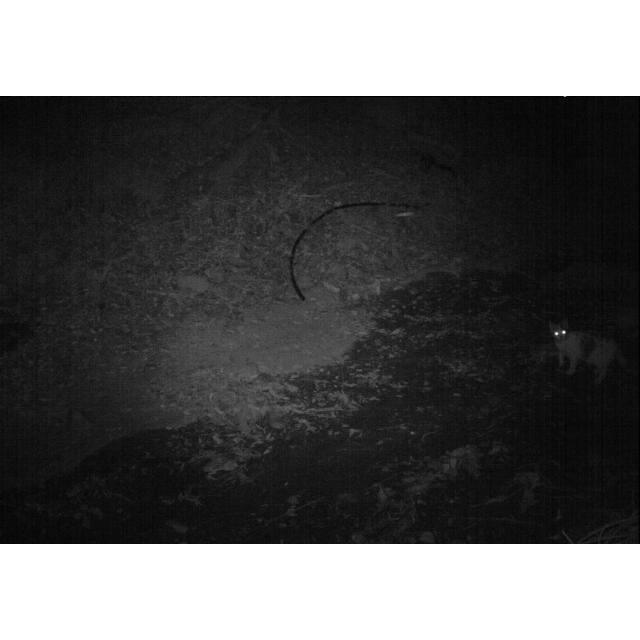



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0affe2-23d2-11e8-a6a3-ec086b02610b_jpg.rf.8b771eec7de52ffbcb3e33fd2d983d3a.jpg
empty


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


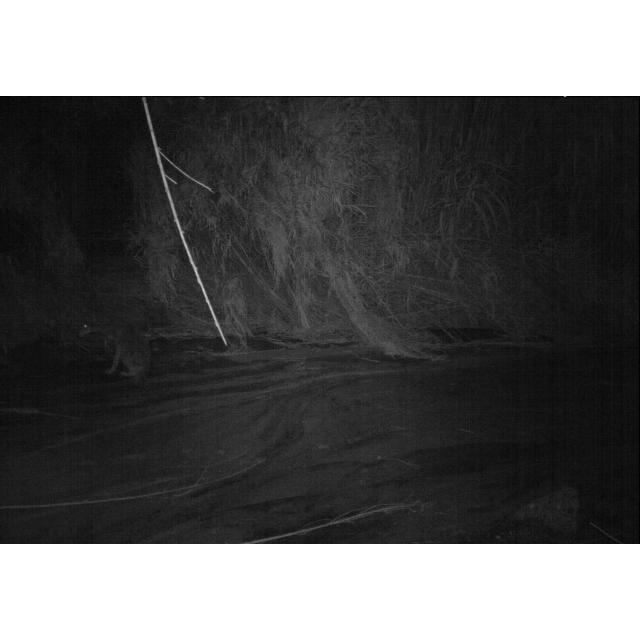



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0b033c-23d2-11e8-a6a3-ec086b02610b_jpg.rf.428aa91f8dfd471cd19a66fdca40fcd2.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


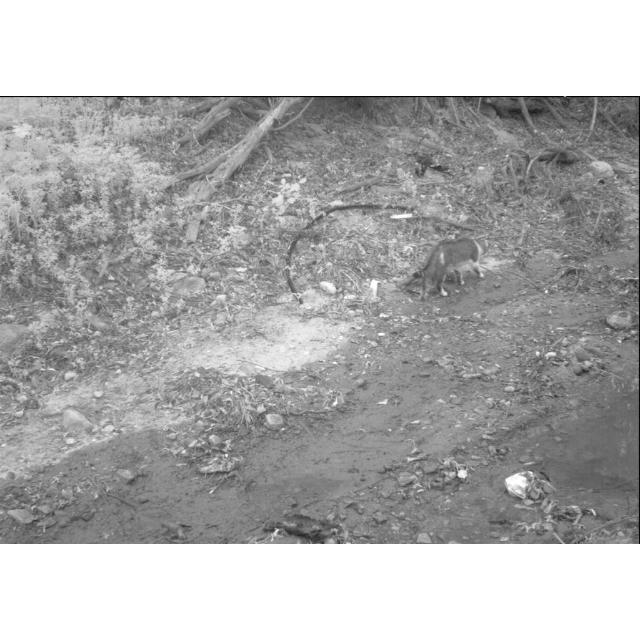



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0fd10d-23d2-11e8-a6a3-ec086b02610b_jpg.rf.bd0285cb7dd66cb4dc0ebbd0788b8d1b.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


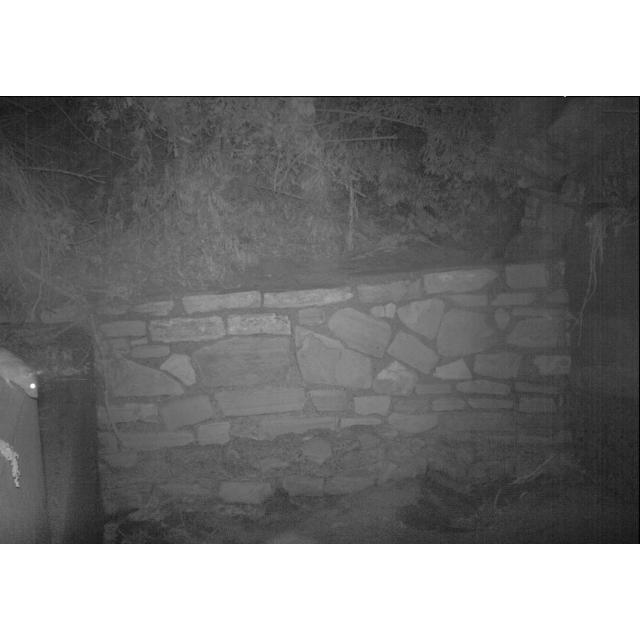



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0c9b52-23d2-11e8-a6a3-ec086b02610b_jpg.rf.610f74a82143bac1c8284f50931ed3fc.jpg
animals_multiple


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


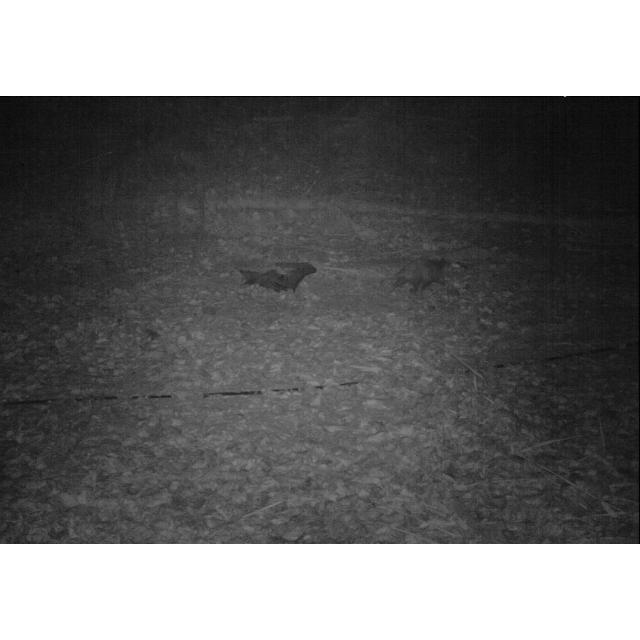



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0c9d2a-23d2-11e8-a6a3-ec086b02610b_jpg.rf.1f27223ebd05c3771d249492c66b2973.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


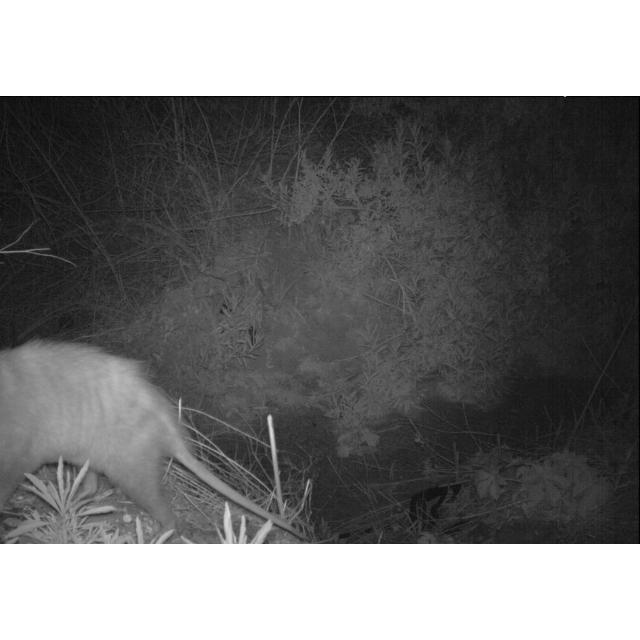



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0e344c-23d2-11e8-a6a3-ec086b02610b_jpg.rf.f6e84bc288a239f0c4da07d19ec320eb.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


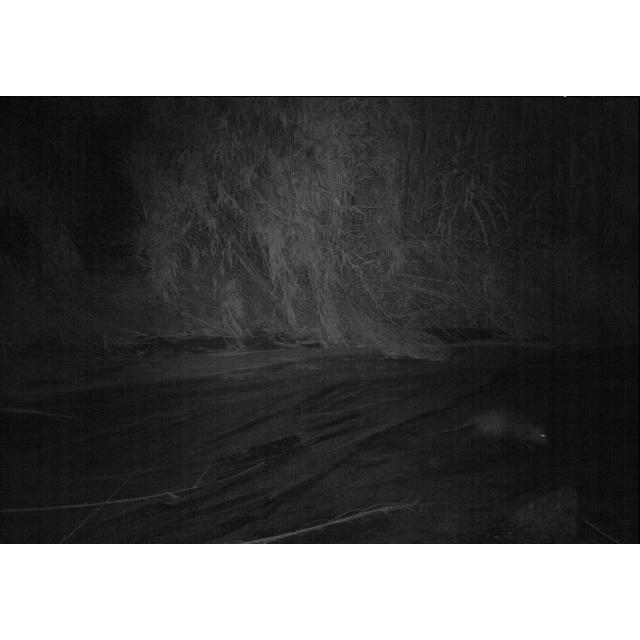



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0b020d-23d2-11e8-a6a3-ec086b02610b_jpg.rf.bd109772b57a0ac903fdf810a62471d8.jpg
empty


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


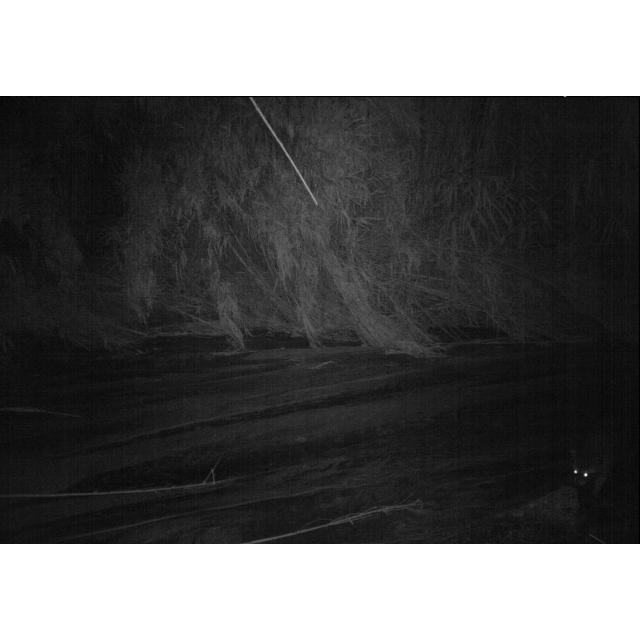



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0fd0f3-23d2-11e8-a6a3-ec086b02610b_jpg.rf.ba2b24b9fde2dec30d8419624e7926bb.jpg
animals_multiple


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


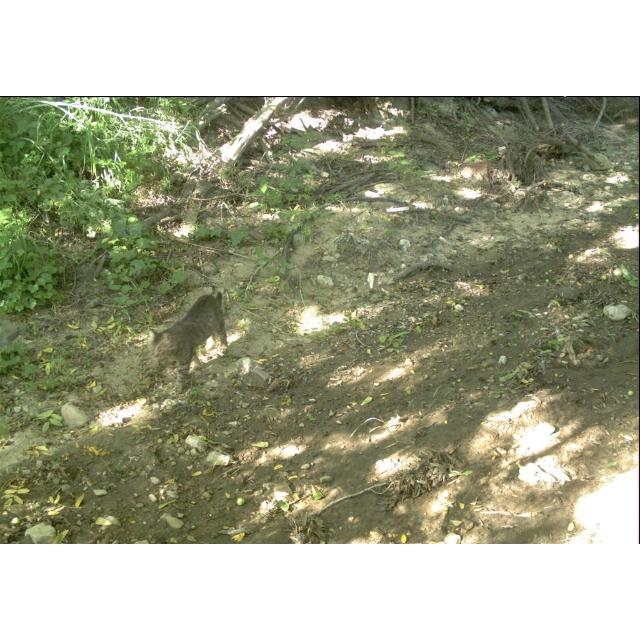



/content/Trail-Camera-Animal-Detection-4/test/animals/5a0c9cc1-23d2-11e8-a6a3-ec086b02610b_jpg.rf.27a2b9db9c713392b8015a4a113ac501.jpg
animals_multiple


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


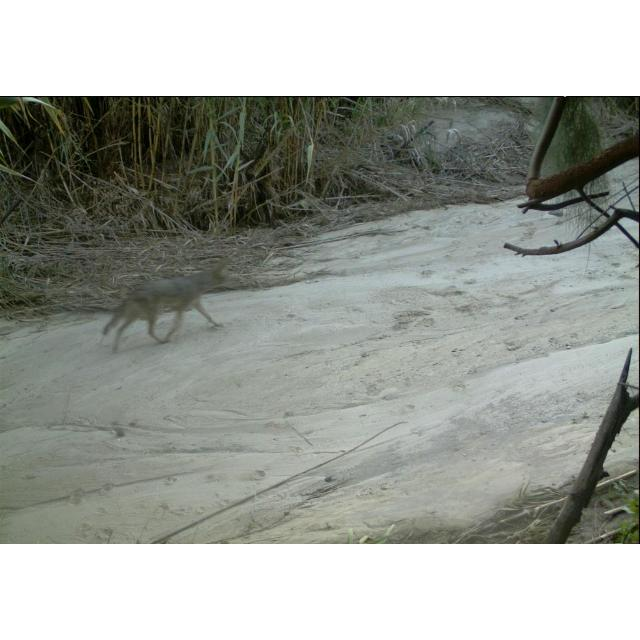



/content/Trail-Camera-Animal-Detection-4/test/empty/5a0b003d-23d2-11e8-a6a3-ec086b02610b_jpg.rf.8f42f293bca9a797893abf4ac3fd58cc.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


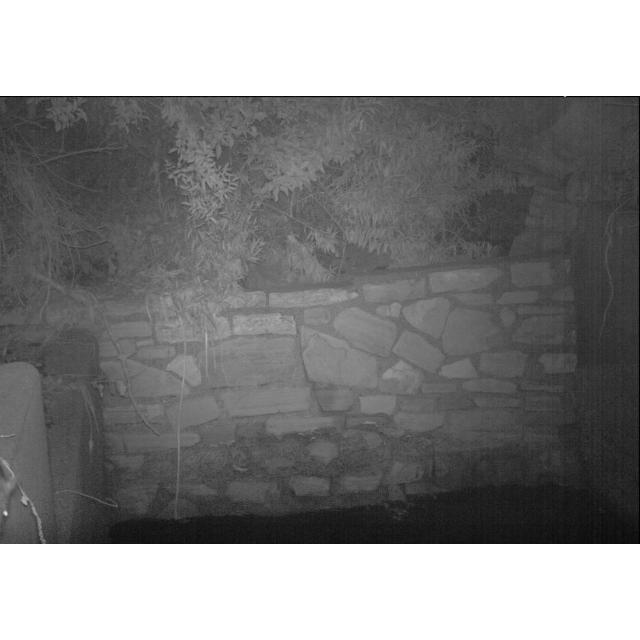



/content/Trail-Camera-Animal-Detection-4/test/empty/5a0fd1cd-23d2-11e8-a6a3-ec086b02610b_jpg.rf.7c9a5540cfb887ad211303fefbc404d8.jpg
empty


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


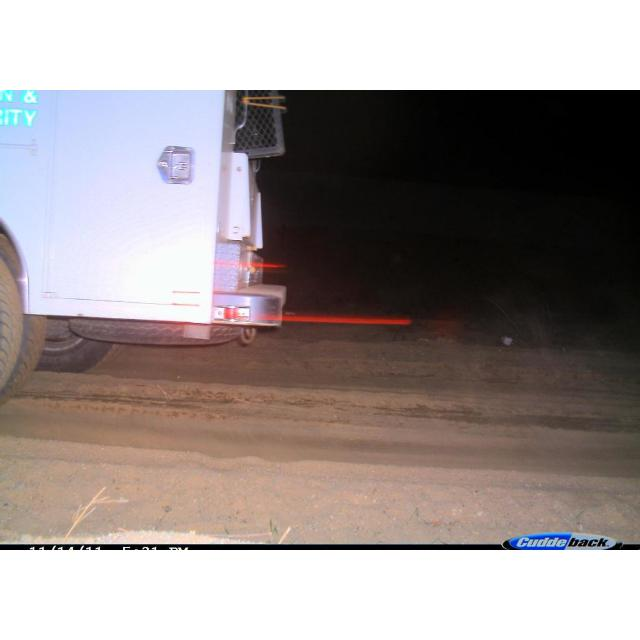



/content/Trail-Camera-Animal-Detection-4/test/empty/5a0b035b-23d2-11e8-a6a3-ec086b02610b_jpg.rf.900613c3bdacbf1189b028859326bf47.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


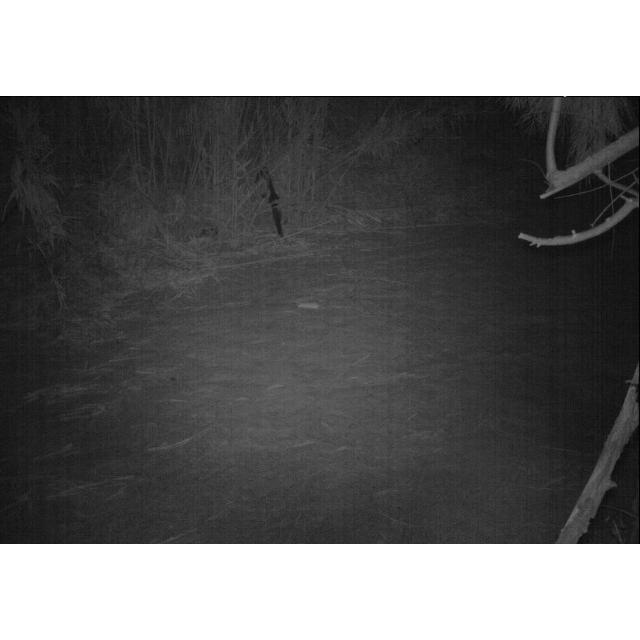



/content/Trail-Camera-Animal-Detection-4/test/empty/5a0c9a49-23d2-11e8-a6a3-ec086b02610b_jpg.rf.f3f01f0ffc62bb4ff9e57676a90d7342.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


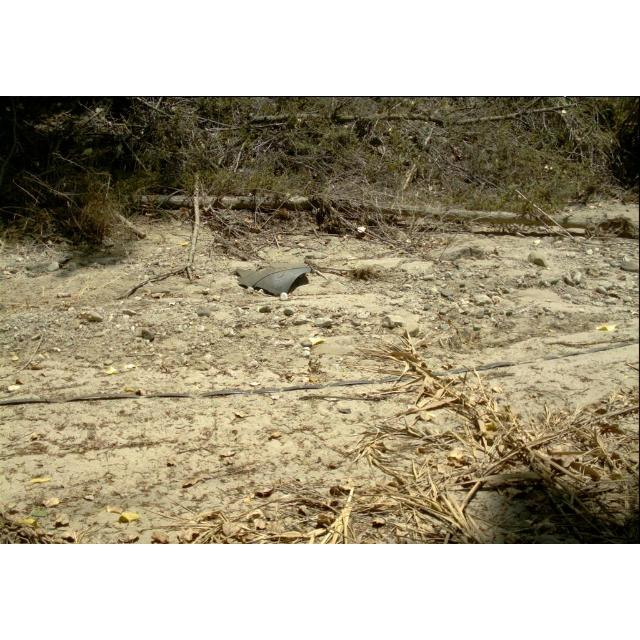



/content/Trail-Camera-Animal-Detection-4/test/empty/5a0c9d71-23d2-11e8-a6a3-ec086b02610b_jpg.rf.28cbe99544dbcbc28bb46d872525f308.jpg
animals_multiple


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


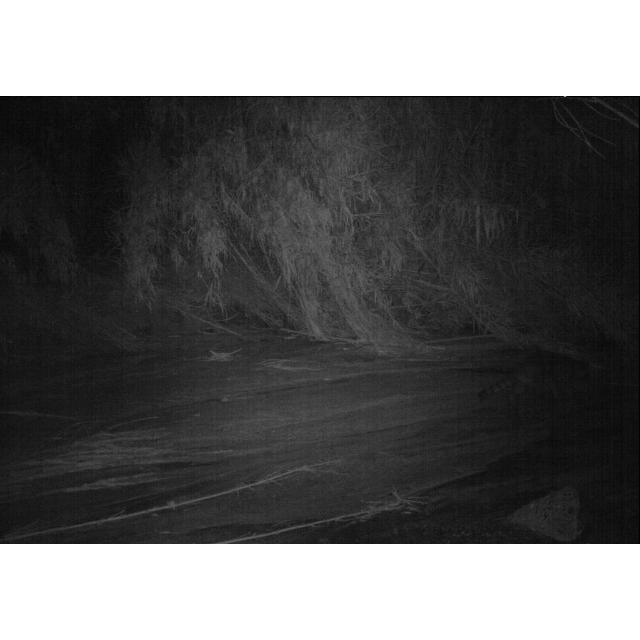



/content/Trail-Camera-Animal-Detection-4/test/empty/5a0b010f-23d2-11e8-a6a3-ec086b02610b_jpg.rf.0bf529e7b91702ee415be97aba999ee5.jpg
empty


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


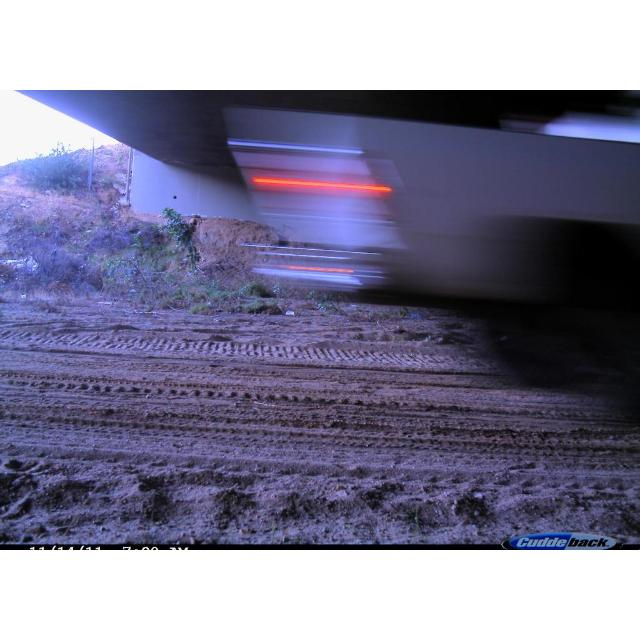



/content/Trail-Camera-Animal-Detection-4/test/empty/5a0c9a76-23d2-11e8-a6a3-ec086b02610b_jpg.rf.6fd066b6e56e6c98629cc6a38527c8b4.jpg
empty


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


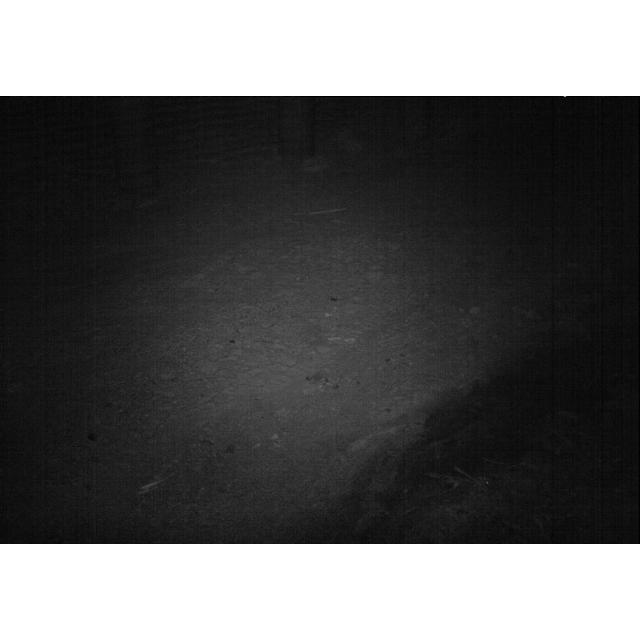



/content/Trail-Camera-Animal-Detection-4/test/empty/5a0e355c-23d2-11e8-a6a3-ec086b02610b_jpg.rf.4f2d3503f7028fd878b816a7be13662f.jpg
empty


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


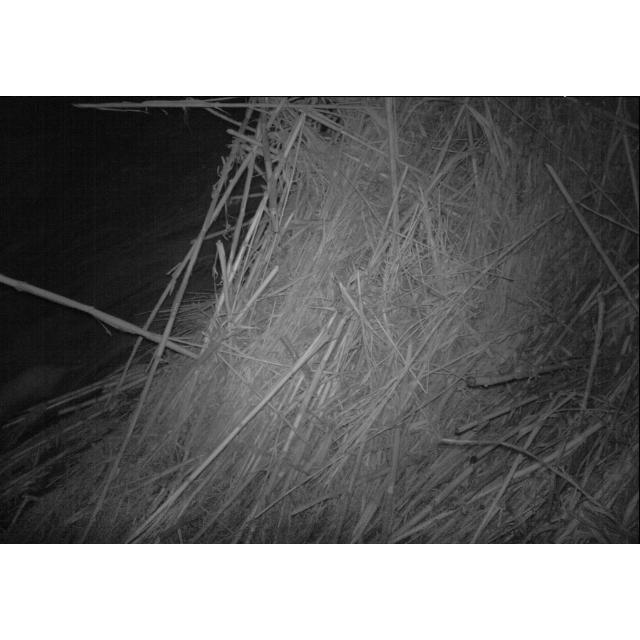



/content/Trail-Camera-Animal-Detection-4/test/empty/5a0fcf7d-23d2-11e8-a6a3-ec086b02610b_jpg.rf.7e58ca782b9c46b9d39d4475450dc6a0.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


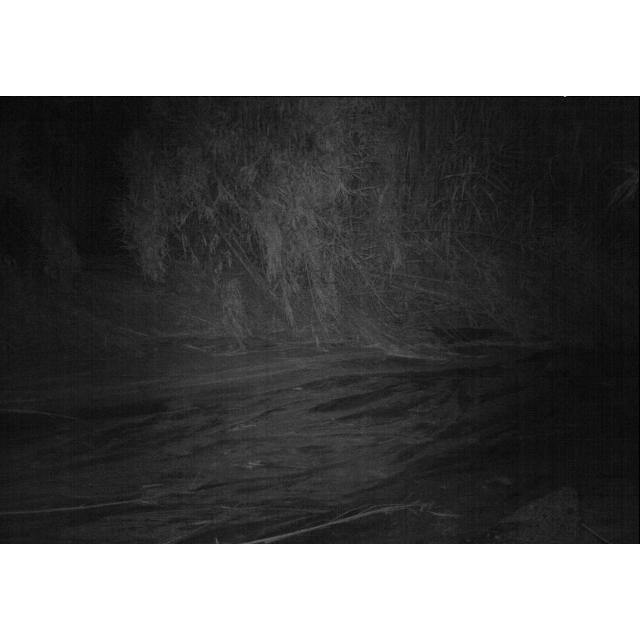



/content/Trail-Camera-Animal-Detection-4/test/empty/5a0b0175-23d2-11e8-a6a3-ec086b02610b_jpg.rf.998cd15968bbd0e6e6253609bb9194b6.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


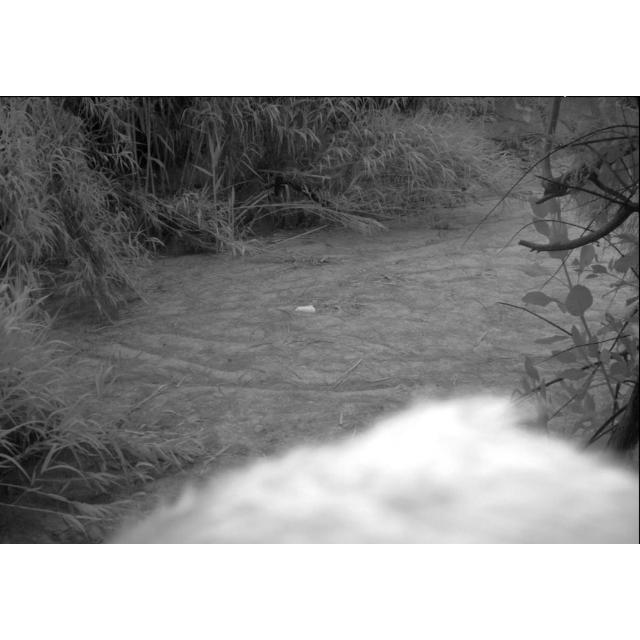



/content/Trail-Camera-Animal-Detection-4/test/empty/5a0c9dd2-23d2-11e8-a6a3-ec086b02610b_jpg.rf.5cfb9706f42a0e3f381182949aa66603.jpg
empty


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


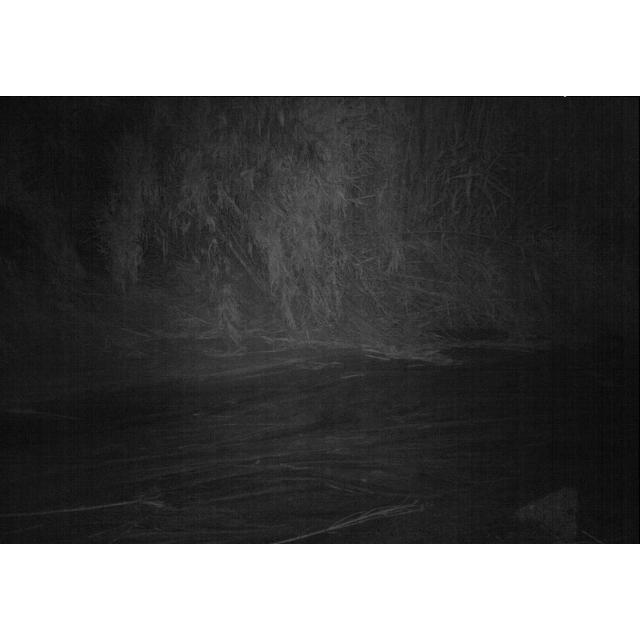



/content/Trail-Camera-Animal-Detection-4/test/empty/5a0fd0ce-23d2-11e8-a6a3-ec086b02610b_jpg.rf.9217e7421904767bbf7c85452f557e32.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


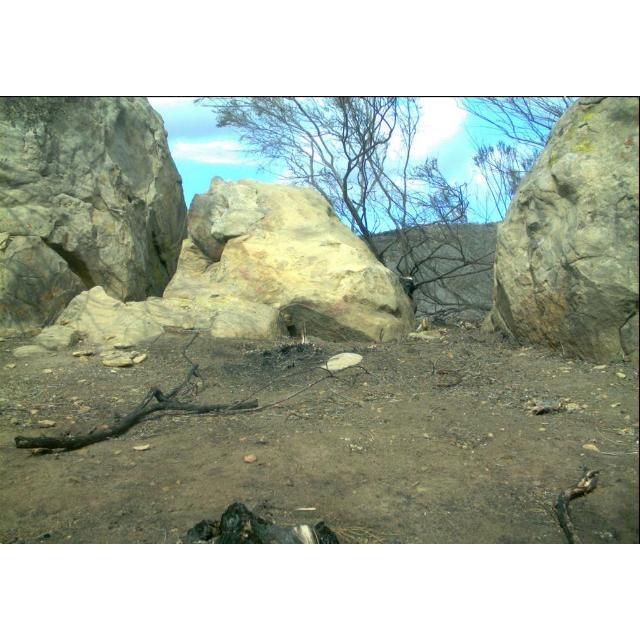



/content/Trail-Camera-Animal-Detection-4/test/empty/5a0b02d5-23d2-11e8-a6a3-ec086b02610b_jpg.rf.1f7be525c398ac57cc7edf863812c971.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


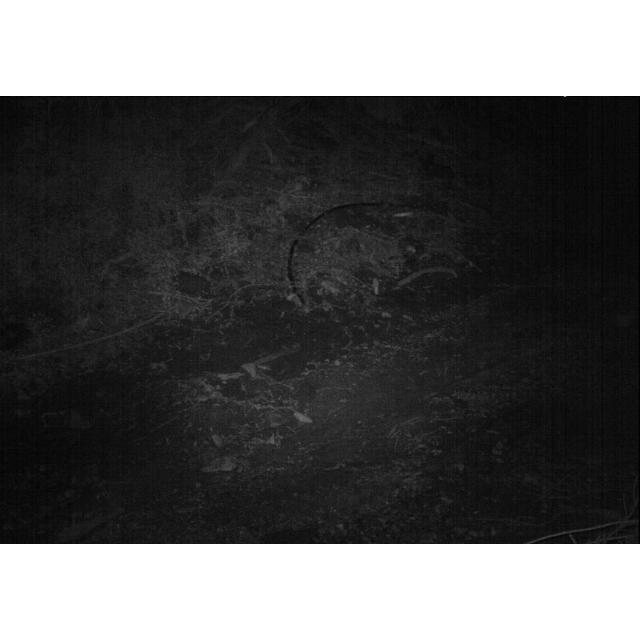



/content/Trail-Camera-Animal-Detection-4/test/empty/5a0b00bf-23d2-11e8-a6a3-ec086b02610b_jpg.rf.3ff9f3778058a2ea8af081c0e05d3539.jpg
empty


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


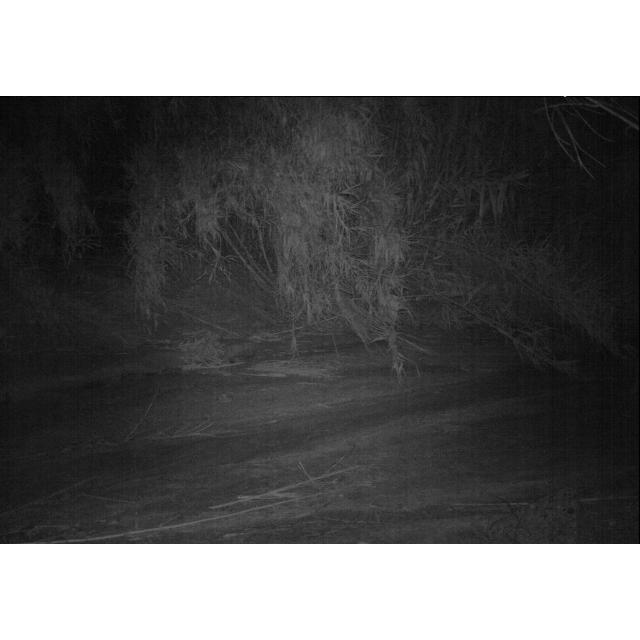



/content/Trail-Camera-Animal-Detection-4/test/empty/5a0b01c5-23d2-11e8-a6a3-ec086b02610b_jpg.rf.e4b8925e65838ec59fc50dbf291c2ed3.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


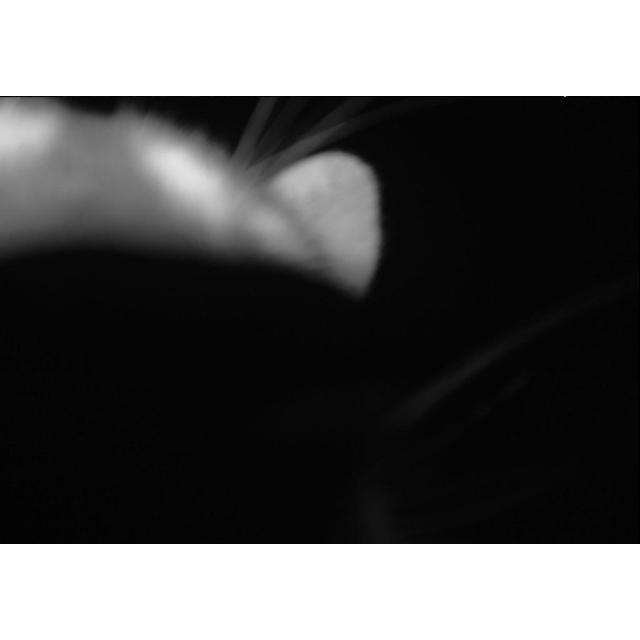



/content/Trail-Camera-Animal-Detection-4/test/empty/5a0c9c83-23d2-11e8-a6a3-ec086b02610b_jpg.rf.c9286effb2465f343b96a463fa071d1f.jpg
animals_multiple


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


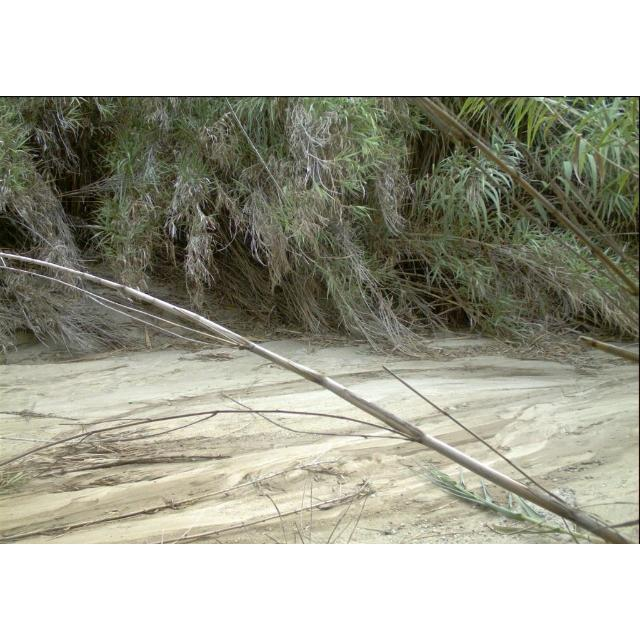



/content/Trail-Camera-Animal-Detection-4/test/empty/5a0c9e0f-23d2-11e8-a6a3-ec086b02610b_jpg.rf.eed63d9c8e0fd9755ab8d9c1984ce111.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


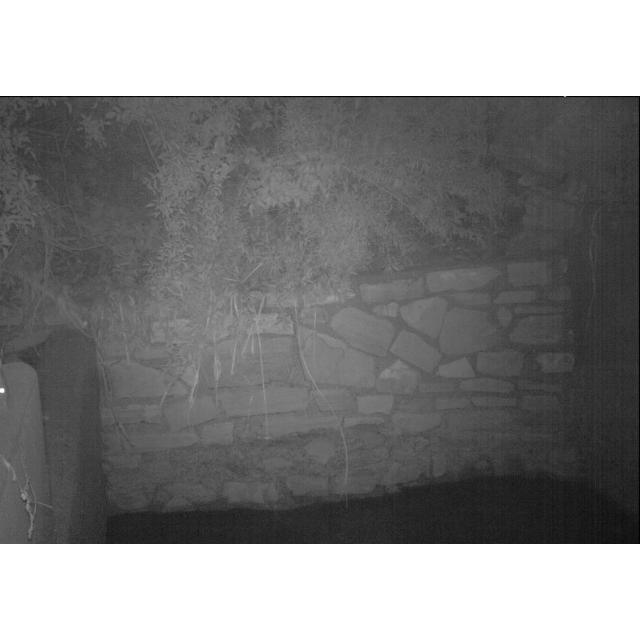



/content/Trail-Camera-Animal-Detection-4/test/empty/5a0c9cd4-23d2-11e8-a6a3-ec086b02610b_jpg.rf.583f65b1ae057be75c061ccd71eb814c.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


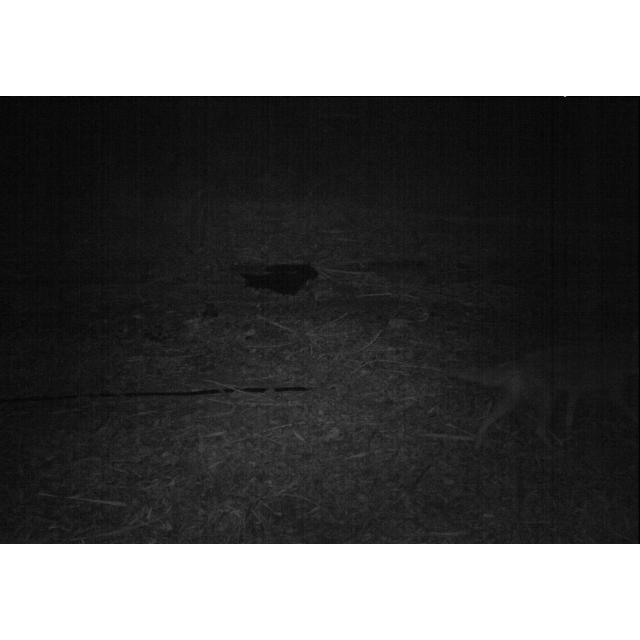



/content/Trail-Camera-Animal-Detection-4/test/empty/5a0b0051-23d2-11e8-a6a3-ec086b02610b_jpg.rf.e91695b25bce9fae42ad9336f4efa023.jpg
empty


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


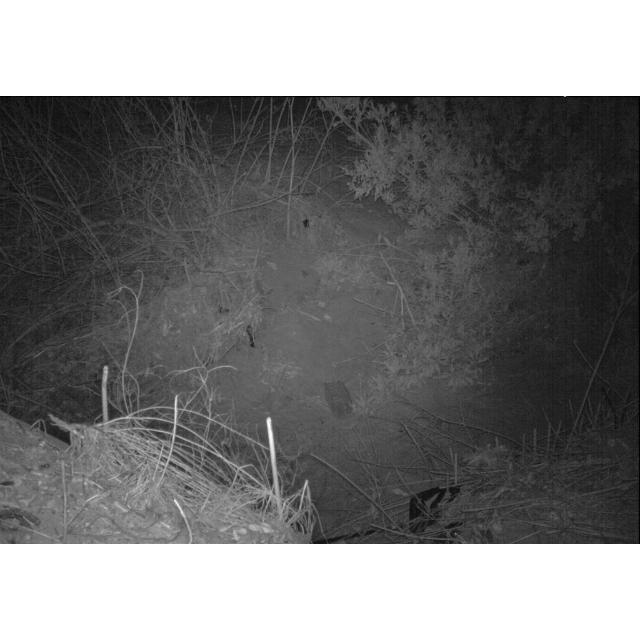



/content/Trail-Camera-Animal-Detection-4/test/empty/5a0fd1e6-23d2-11e8-a6a3-ec086b02610b_jpg.rf.6908f31bdfda380a8c6dbe0804769134.jpg
animals_multiple


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


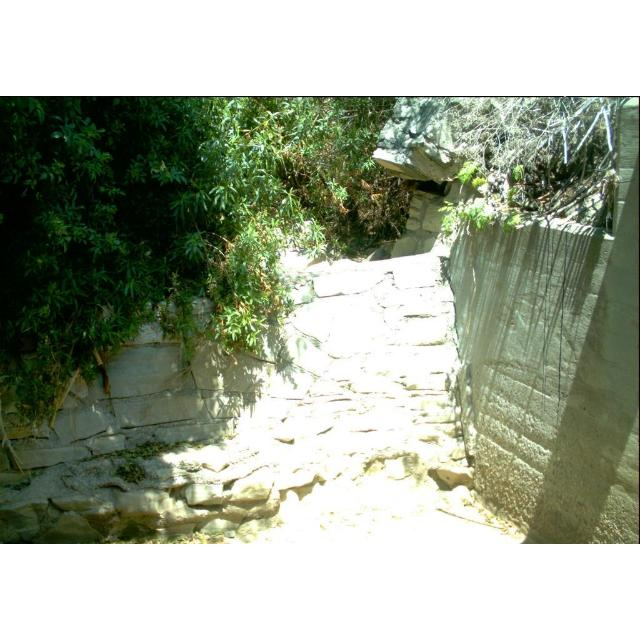



/content/Trail-Camera-Animal-Detection-4/test/empty/5a0e3713-23d2-11e8-a6a3-ec086b02610b_jpg.rf.e2884e1facb35c6d1dcdd7dcb348c6ba.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


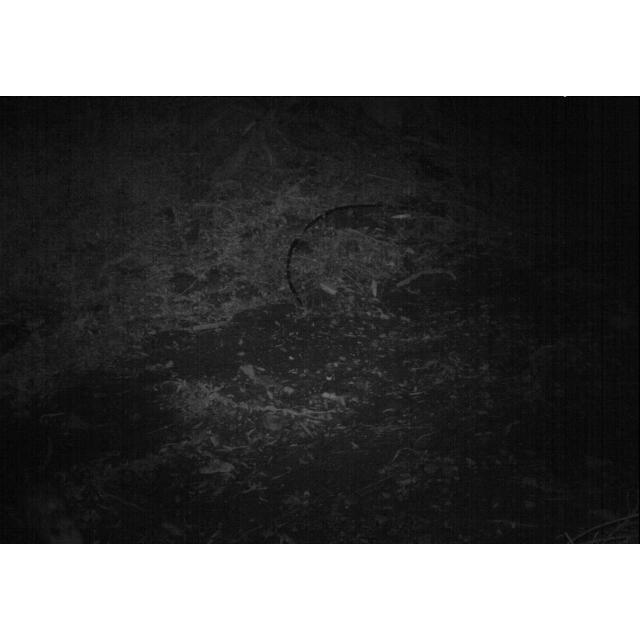



/content/Trail-Camera-Animal-Detection-4/test/empty/5a0e3645-23d2-11e8-a6a3-ec086b02610b_jpg.rf.b0930603626c675a01d938ced89ff4b2.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


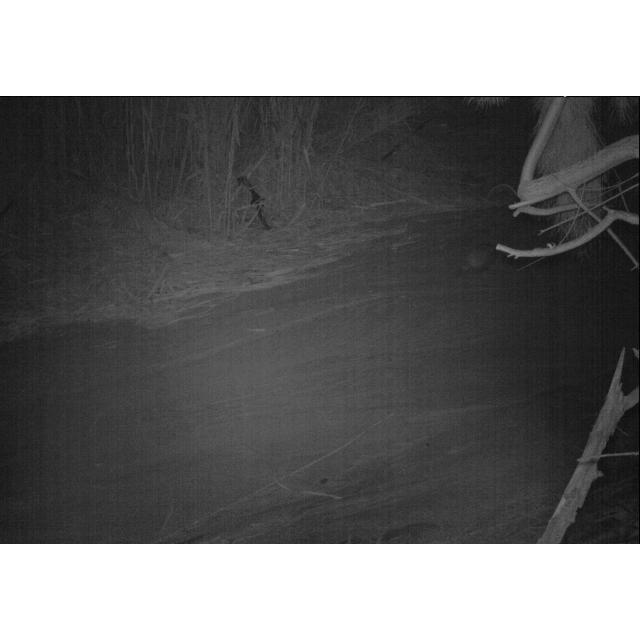



/content/Trail-Camera-Animal-Detection-4/test/empty/5a0c9c2a-23d2-11e8-a6a3-ec086b02610b_jpg.rf.d398f52ea91a4ecf123c28d6b3c5a9c0.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


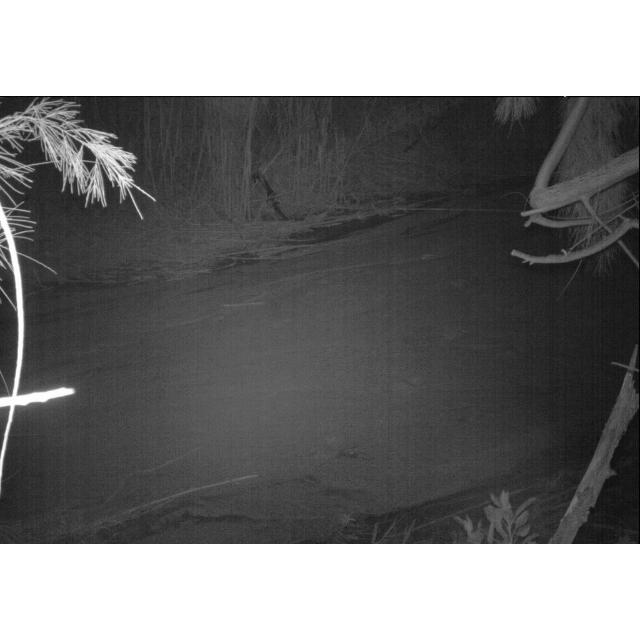



/content/Trail-Camera-Animal-Detection-4/test/empty/5a0c9aa2-23d2-11e8-a6a3-ec086b02610b_jpg.rf.5952ebaec9c0f9a8216379cf50ffbe36.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


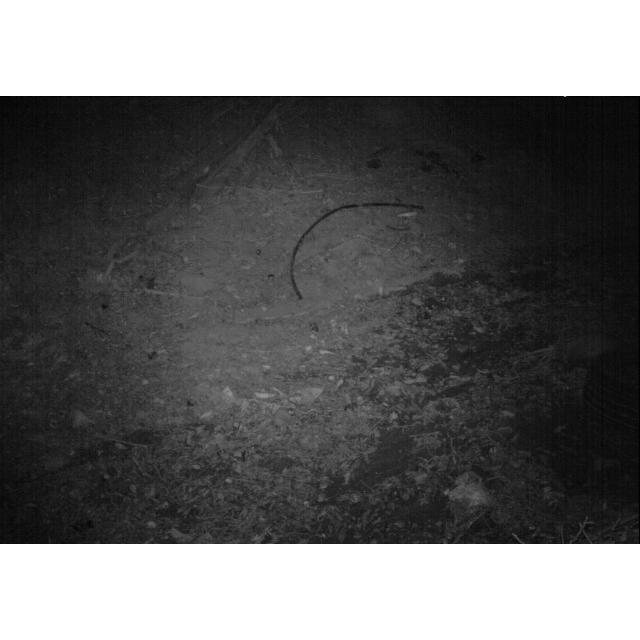



/content/Trail-Camera-Animal-Detection-4/test/empty/5a0e35c2-23d2-11e8-a6a3-ec086b02610b_jpg.rf.f050c0ff5b90e7b3dfe6dd20e48087c4.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


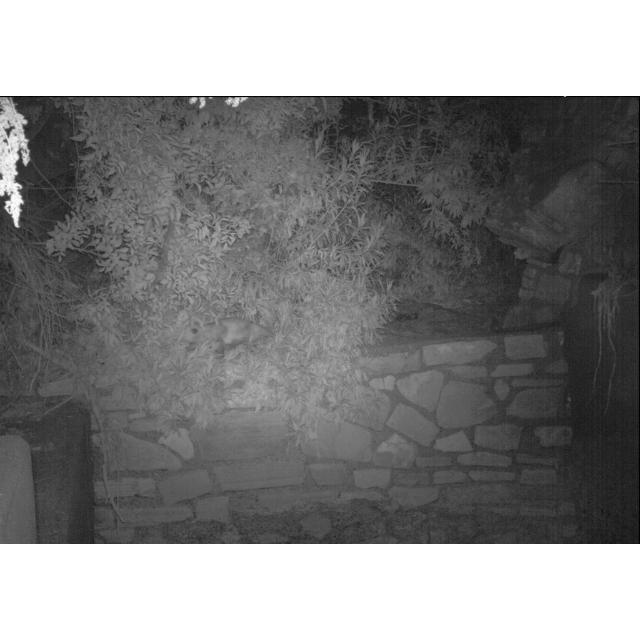



/content/Trail-Camera-Animal-Detection-4/test/empty/5a0b0055-23d2-11e8-a6a3-ec086b02610b_jpg.rf.7545ec0904c8d3fc53af3d4f9cff543d.jpg
empty


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


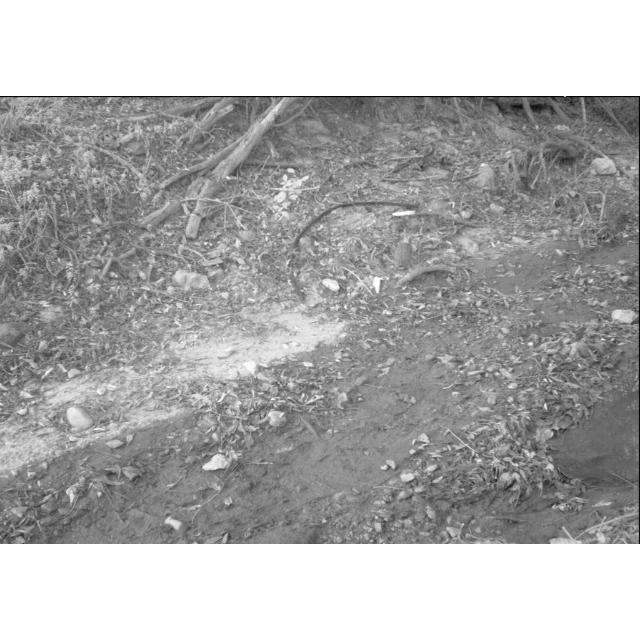



/content/Trail-Camera-Animal-Detection-4/test/empty/5a0fcf64-23d2-11e8-a6a3-ec086b02610b_jpg.rf.b6c9d54b5a36dacbba6c0202cf33893f.jpg
empty


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


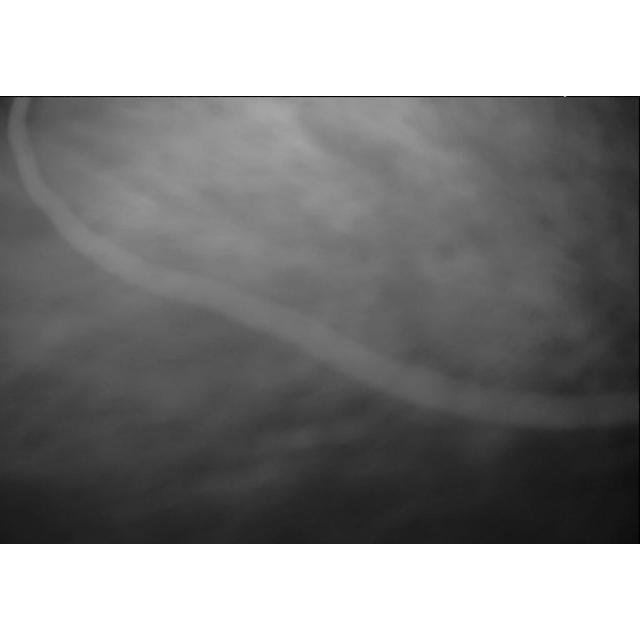



/content/Trail-Camera-Animal-Detection-4/test/empty/5a0fd1f5-23d2-11e8-a6a3-ec086b02610b_jpg.rf.1fc517f6c9028505823b15802fb0bd36.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


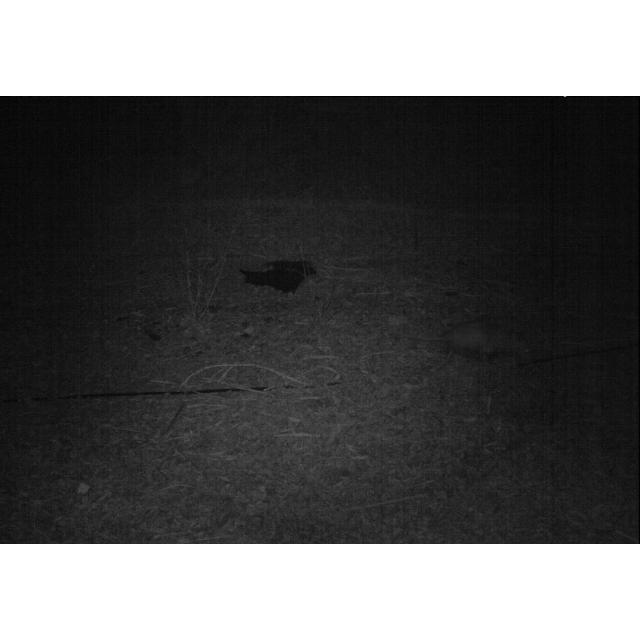



/content/Trail-Camera-Animal-Detection-4/test/empty/5a0b02e9-23d2-11e8-a6a3-ec086b02610b_jpg.rf.99d3aaef4cdb3af531bb5aef7641dca2.jpg
empty


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


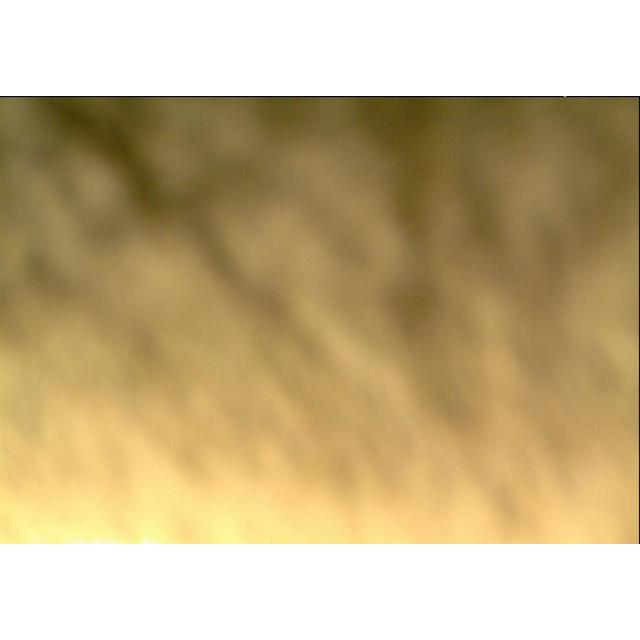



/content/Trail-Camera-Animal-Detection-4/test/empty/5a0b0083-23d2-11e8-a6a3-ec086b02610b_jpg.rf.01f05b05b8bb6e7653c37afcda7b7cd8.jpg
animals_multiple


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


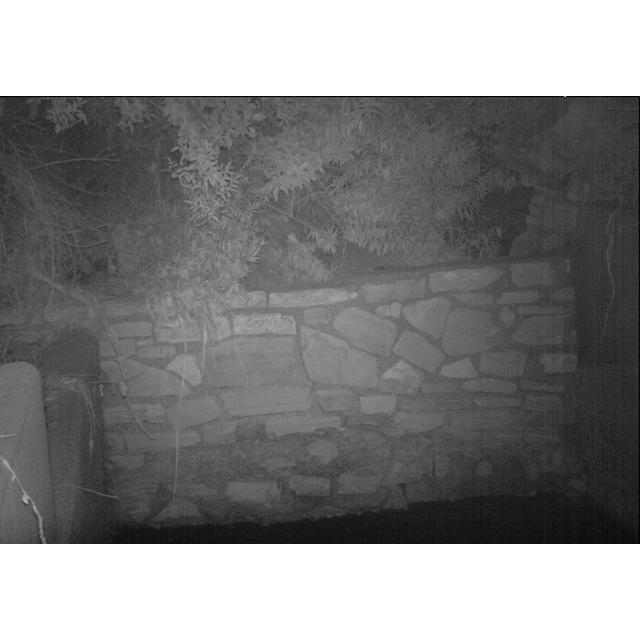



/content/Trail-Camera-Animal-Detection-4/test/empty/5a0fd1ee-23d2-11e8-a6a3-ec086b02610b_jpg.rf.27d007096c73e3827eca1ec1d7b0141a.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


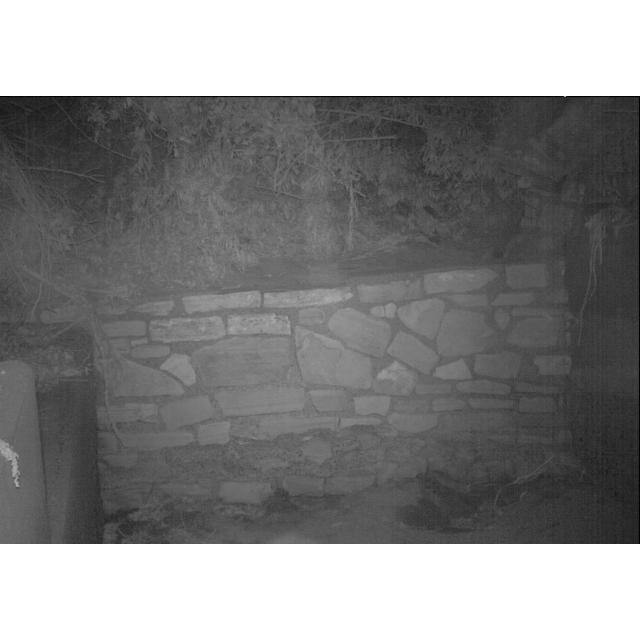



/content/Trail-Camera-Animal-Detection-4/test/empty/5a0b001d-23d2-11e8-a6a3-ec086b02610b_jpg.rf.f8b26cdae5ecd0fff12f533585281bb5.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


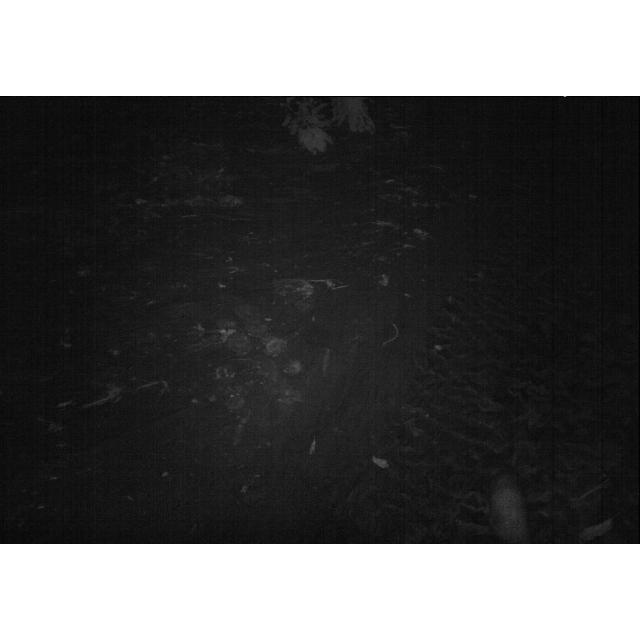



/content/Trail-Camera-Animal-Detection-4/test/empty/5a0e3453-23d2-11e8-a6a3-ec086b02610b_jpg.rf.289c6051ef7ca2dded322864e57cb8ad.jpg
empty


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


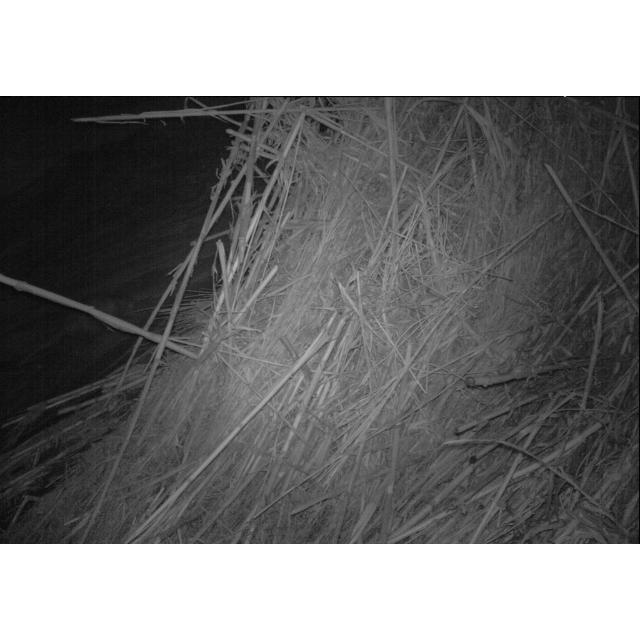



/content/Trail-Camera-Animal-Detection-4/test/empty/5a0fcf3a-23d2-11e8-a6a3-ec086b02610b_jpg.rf.7065af6ff10a6079e08f3e4b23beee9f.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


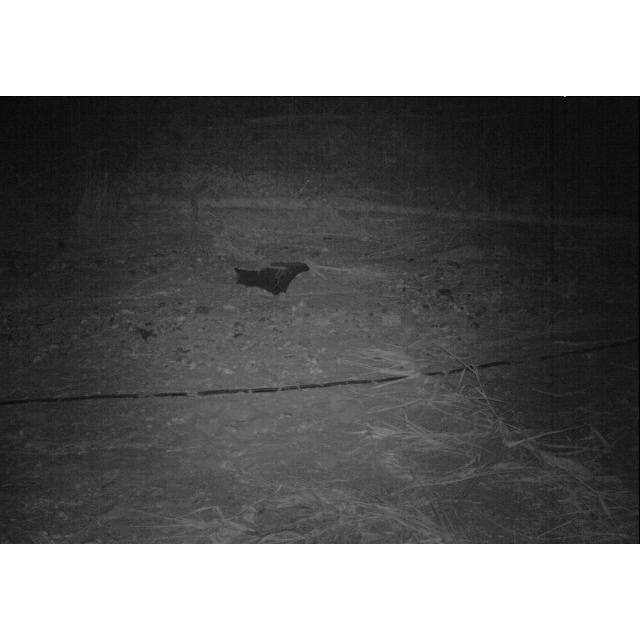



/content/Trail-Camera-Animal-Detection-4/test/empty/5a0c9cdf-23d2-11e8-a6a3-ec086b02610b_jpg.rf.7334db6d8fa10c931324e32bf8ef9ad3.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


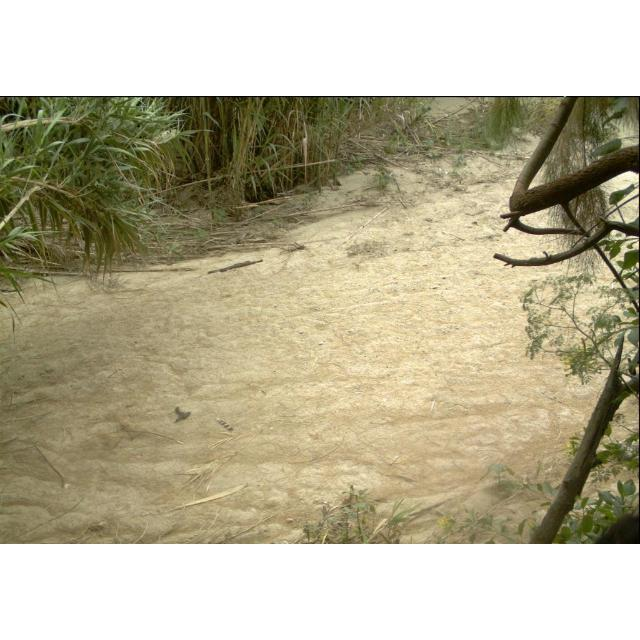



/content/Trail-Camera-Animal-Detection-4/test/empty/5a0b0210-23d2-11e8-a6a3-ec086b02610b_jpg.rf.2eb85b5615f19c4da3c2396d4075a8a3.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


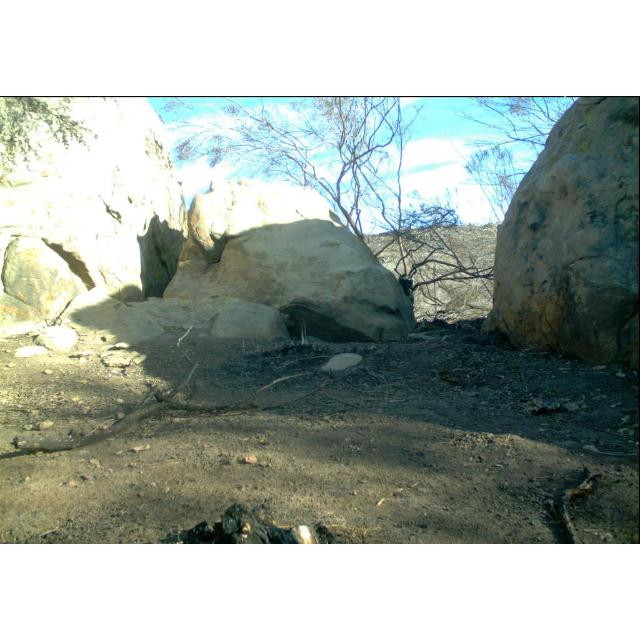



/content/Trail-Camera-Animal-Detection-4/test/empty/5a0e3509-23d2-11e8-a6a3-ec086b02610b_jpg.rf.b8d4f503fe644cc7df003d796eb4e862.jpg
empty


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


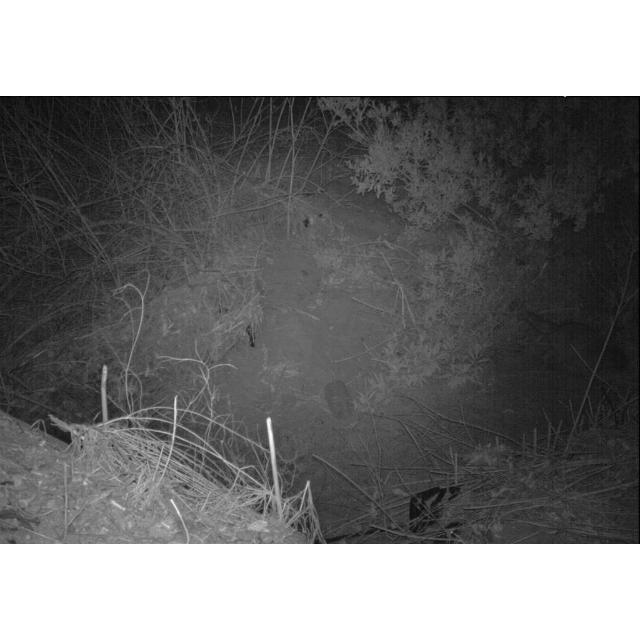



/content/Trail-Camera-Animal-Detection-4/test/empty/5a0affd6-23d2-11e8-a6a3-ec086b02610b_jpg.rf.78156aa43e24d461475bd254d56f0384.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


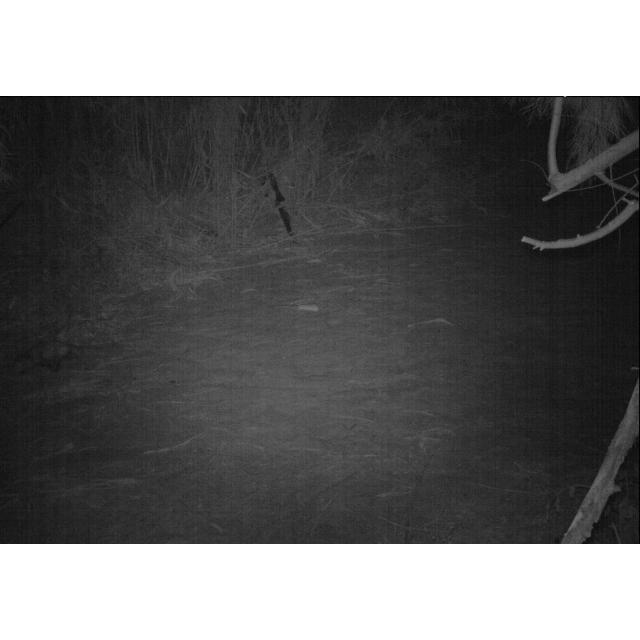



/content/Trail-Camera-Animal-Detection-4/test/empty/5a0c9c30-23d2-11e8-a6a3-ec086b02610b_jpg.rf.dce3643c23355515d6265d52f08db36f.jpg
animals_multiple


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


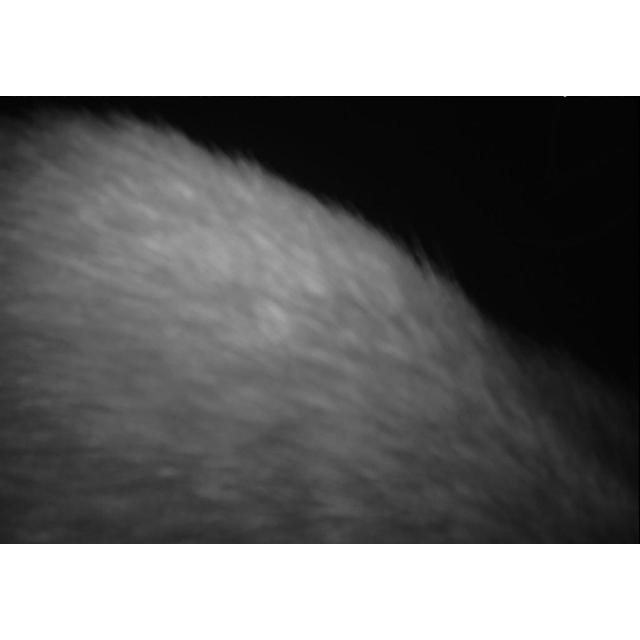



/content/Trail-Camera-Animal-Detection-4/test/empty/5a0b0085-23d2-11e8-a6a3-ec086b02610b_jpg.rf.3cb05e25944e520211bbfea649f98104.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


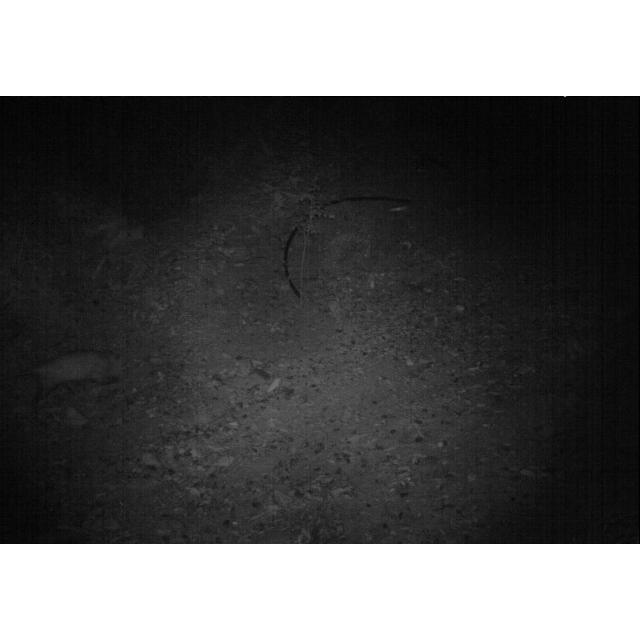



/content/Trail-Camera-Animal-Detection-4/test/empty/5a0e358e-23d2-11e8-a6a3-ec086b02610b_jpg.rf.a96c67e4dc70308934fdd6592ffc5c78.jpg
animals_multiple


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


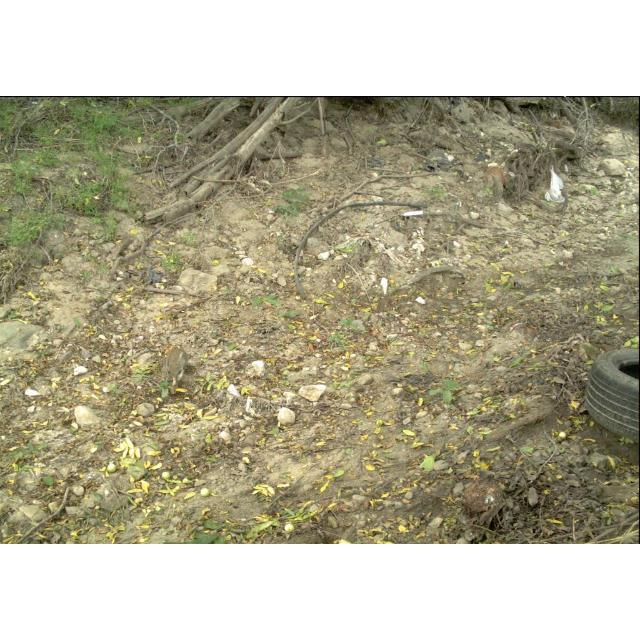



/content/Trail-Camera-Animal-Detection-4/test/empty/5a0b0222-23d2-11e8-a6a3-ec086b02610b_jpg.rf.93b8a1399cc1e7122c2776329555b621.jpg
empty


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


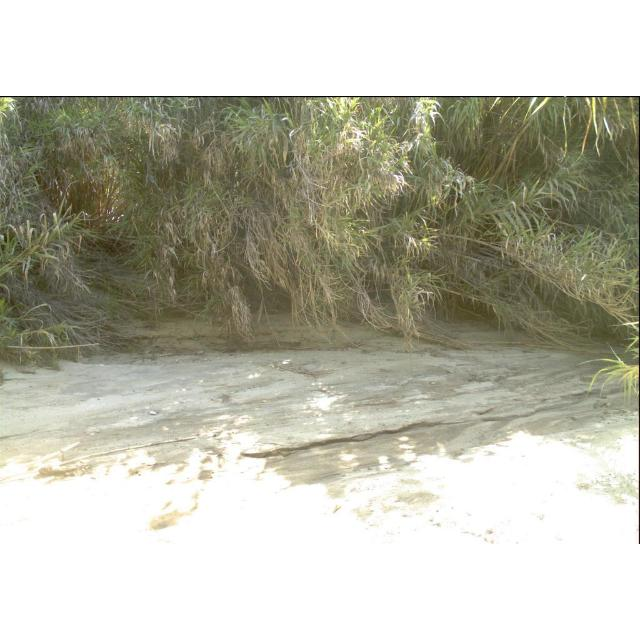



/content/Trail-Camera-Animal-Detection-4/test/empty/5a0c9ab7-23d2-11e8-a6a3-ec086b02610b_jpg.rf.35917a47b470f78319e1a21f0027b052.jpg
animals


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


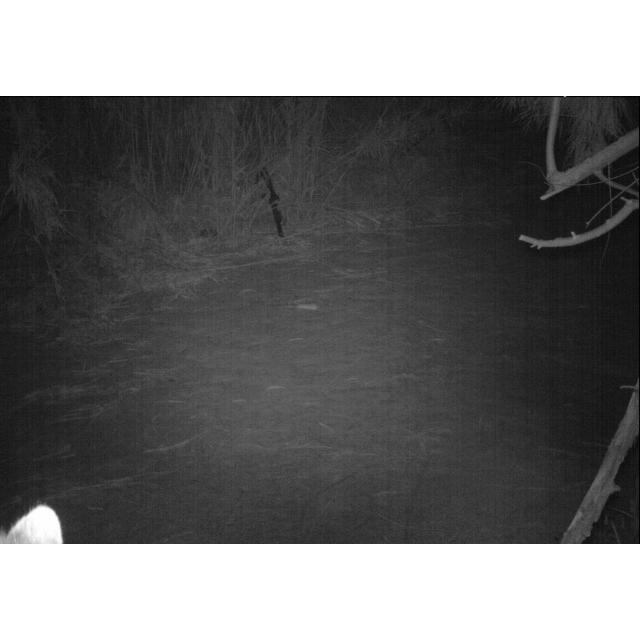



/content/Trail-Camera-Animal-Detection-4/test/empty/5a0b001e-23d2-11e8-a6a3-ec086b02610b_jpg.rf.b327aec164d3fb8298e3f7b101fc1c8c.jpg
empty


Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


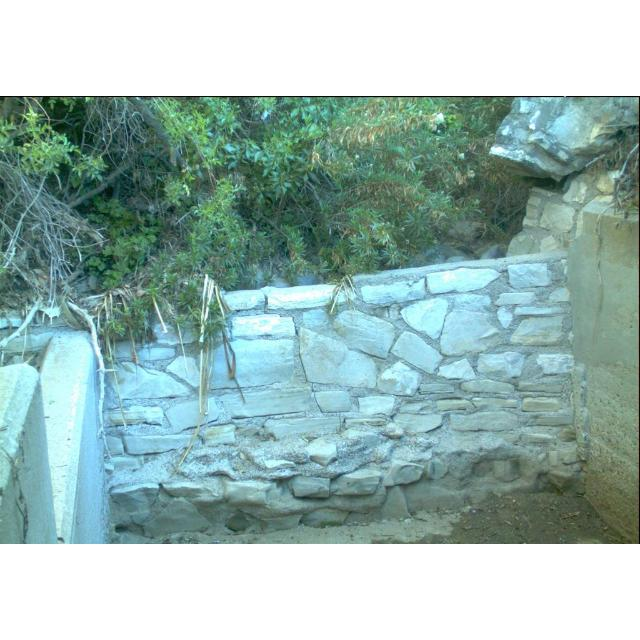

In [ ]:
#run inference on test images
import glob
from IPython.display import Image, display

model = learn.model
model = model.cuda()

for imageName in glob.glob('/content/Trail-Camera-Animal-Detection-4/test/*/*.jpg'):
    print(imageName)
    img = open_image(imageName)
    prediction = learn.predict(img)
    #print(prediction)
    print(prediction[0])
    display(Image(filename=imageName))
    print("\n")

# Save custom classification model for future use

In [ ]:
#model is automatically saved with the "save_best_model" callback
%ls /content/Trail-Camera-Animal-Detection-4/models

best_resnet34.pth  tmp.pth


In [ ]:
from google.colab import files
files.download('/content/Trail-Camera-Animal-Detection-4/models/best_resnet34.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#HOME = os.getcwd()
#%cd {HOME}
#project.version(dataset.version).deploy(model_type="resnet34", model_path=f"{HOME}/runs/detect/train/")